In [1]:
import pandas as pd
import numpy as np

In [2]:
import gc
from tqdm import tqdm
import sys

tqdm.pandas()
sys.path.append('../')

### Gender

In [7]:
item = pd.read_csv('')

FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/articles.csv'

In [4]:
def set_gender_flg(x):
    female_pro_types = [
        "Bra",
        "Underwear Tights",
        "Leggings/Tights",
        "Hair clip",
        "Hair string",
        "Hair/alice band",
        "Bikini top",
        "Skirt",
        "Dress",
        "Earring",
        "Alice band",
        "Straw hat",
        "Necklace",
        "Ballerinas",
        "Blouse",
        "Beanie",
        "Giftbox",
        "Pumps",
        "Bootie",
        "Heeled sandals",
        "Nipple covers",
        "Hair ties",
        "Underwear corset",
        "Bra extender",
        "Underdress",
        "Underwear set",
        "Sarong",
        "Leg warmers",
        "Hairband",
        "Tote bag",
        "Earrings",
        "Flat shoes",
        "Heels",
        "Cap",
        "Shoulder bag",
        "Headband",
        "Baby Bib",
        "Cross-body bag",
        "Bumbag",
    ]
    x["gender"] = 0 # * 0 for not divided, 1 for male, 2 for female
    if x["index_group_name"] == "Ladieswear":
        x["gender"] = 2
    elif x["index_group_name"] == "Menswear":
        x["gender"] = 1
    else:
        if (
            "boy" in x["department_name"].lower()
            or "men" in x["department_name"].lower()
        ):
            x["gender"] = 1
        if (
            "girl" in x["department_name"].lower()
            or "ladies" in x["department_name"].lower()
            or x["product_type_name"] in female_pro_types
        ):
            x["gender"] = 2
    return x

In [5]:
item = item.progress_apply(set_gender_flg, axis=1)

NameError: name 'item' is not defined

In [6]:
trans = pd.read_csv('../data/raw/transactions_train.csv')
trans['t_dat'] = pd.to_datetime(trans['t_dat'])
trans['YYYY_MM'] = trans['t_dat'].dt.year.astype(str) + '_' + trans['t_dat'].dt.month.astype(str)
# trans['week'] = (trans['t_dat'] - trans['t_dat'].min()).dt.days // 7
trans = pd.merge(trans, item[['article_id','gender','product_type_name']], on='article_id', how='left')
del item
gc.collect()

FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/transactions_train.csv'

In [ ]:
user = pd.read_csv('../data/raw/customers.csv')
trans = trans.merge(user[['customer_id','postal_code']], on='customer_id', how='left')
del user
gc.collect()

0

In [ ]:
ttl_cnt = trans.groupby(['customer_id']).size().reset_index(name='ttl_cnt')
gender_sale = trans.groupby(['customer_id','gender']).size().reset_index(name='cnt')
gender_sale = gender_sale.merge(ttl_cnt, on=['customer_id'], how='left')
gender_sale['ratio'] = gender_sale['cnt'] / gender_sale['ttl_cnt']

In [ ]:
gender_sale = pd.pivot_table(gender_sale, values='ratio', index='customer_id', columns=['gender'])
gender_sale = gender_sale.reset_index()
gender_sale = gender_sale.fillna(0)

In [ ]:
gender_sale['gender'] = 0
gender_sale.loc[gender_sale[1]>=0.8, 'gender'] = 1
gender_sale.loc[gender_sale[2]>=0.8, 'gender'] = 2

<AxesSubplot:>

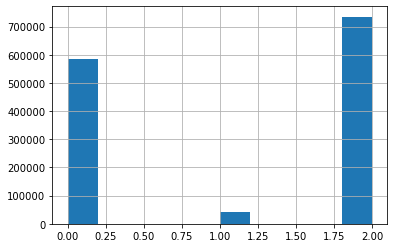

In [ ]:
gender_sale['gender'].hist()

### Sale Trend

In [ ]:
ttl_sale = trans.groupby('product_type_name').size().reset_index(name='ttl_sale')
month_sale = trans.groupby(['YYYY_MM','product_type_name']).size().reset_index(name='month_sale')
month_sale = month_sale.merge(ttl_sale, on=['product_type_name'], how='left')
month_sale['sale_ratio'] = month_sale['month_sale'] / month_sale['ttl_sale']
# week_sale = trans.groupby(['week','product_type_name']).size().reset_index(name='week_sale')
# week_sale = week_sale.merge(ttl_sale, on=['product_type_name'], how='left')
# week_sale['sale_ratio'] = week_sale['week_sale'] / week_sale['ttl_sale']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

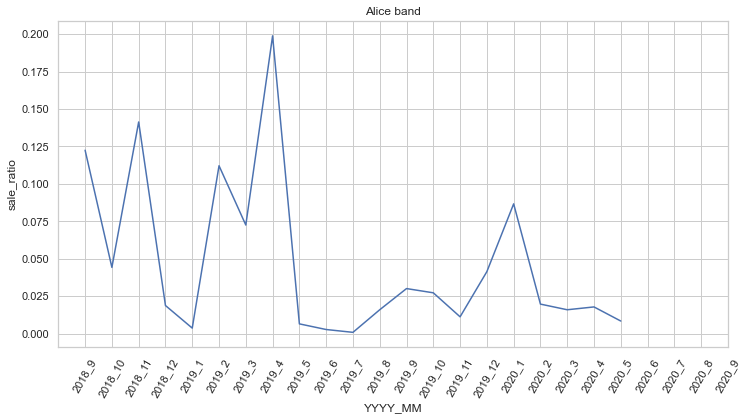

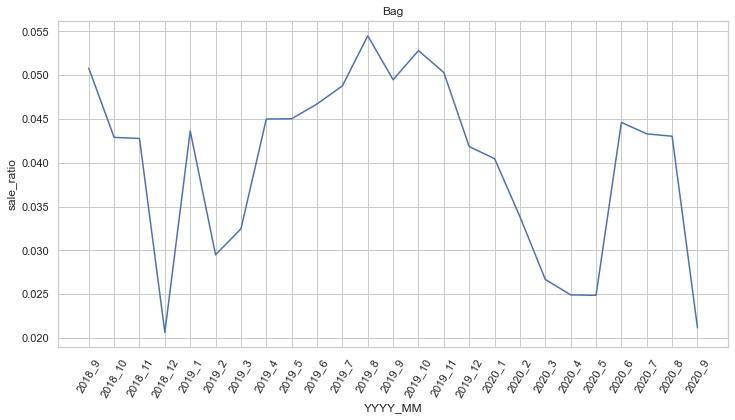

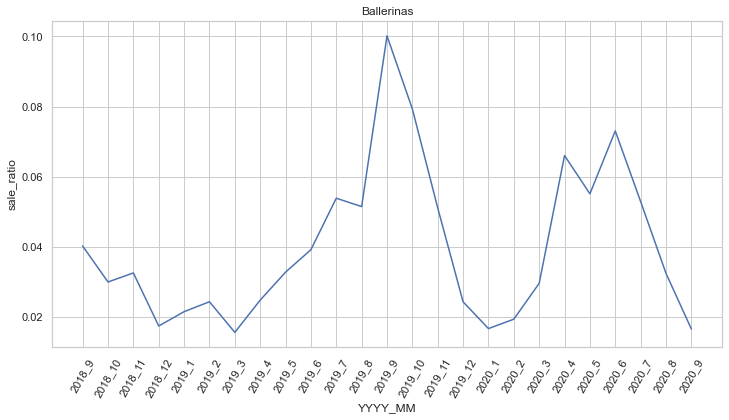

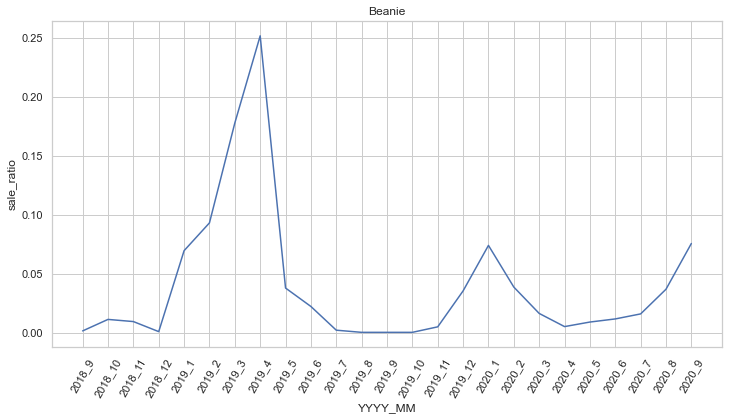

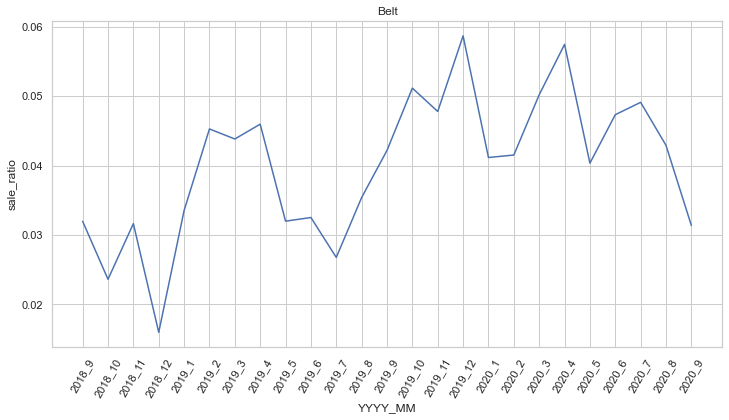

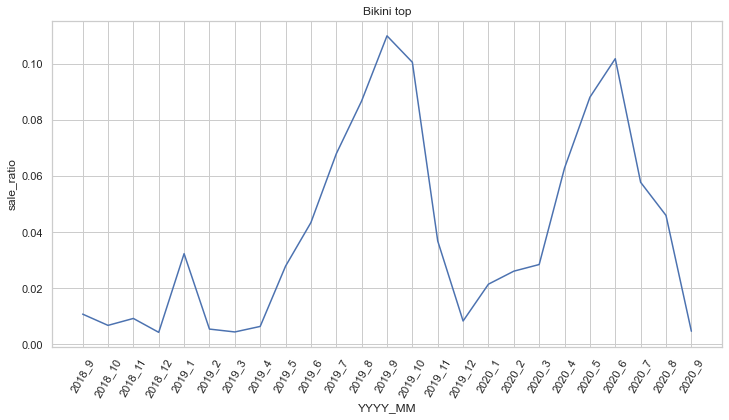

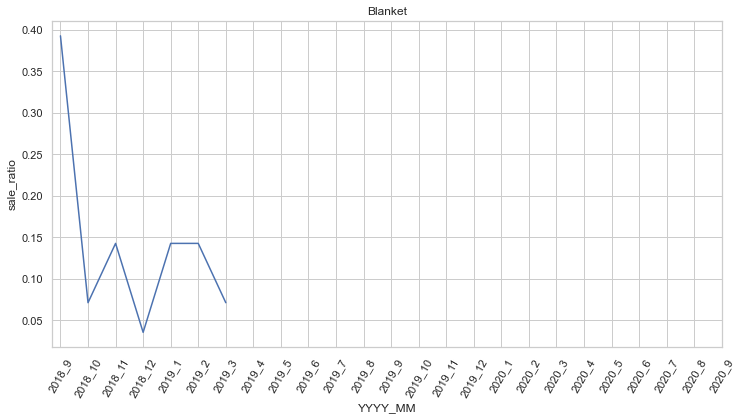

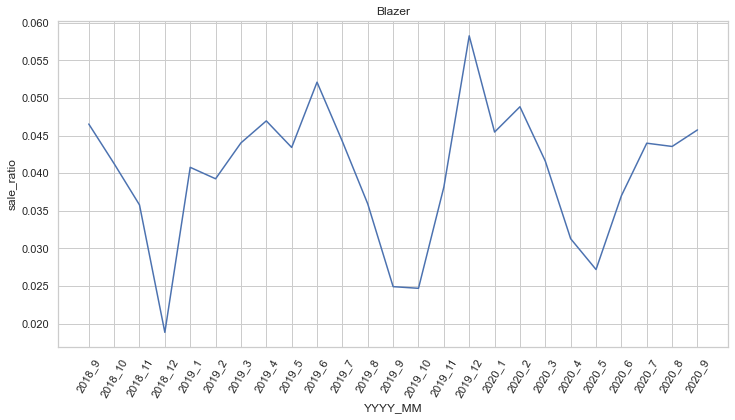

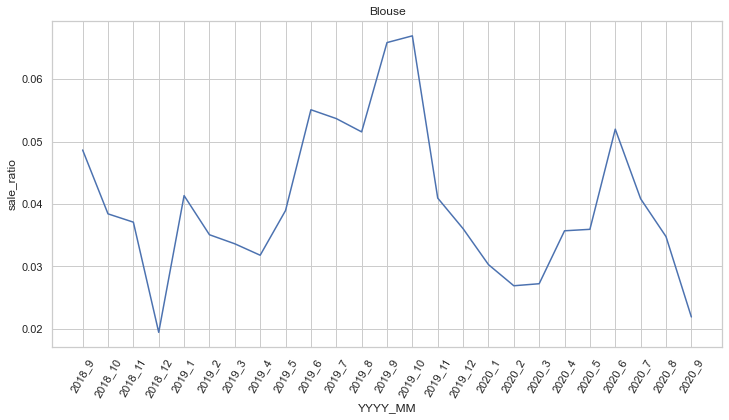

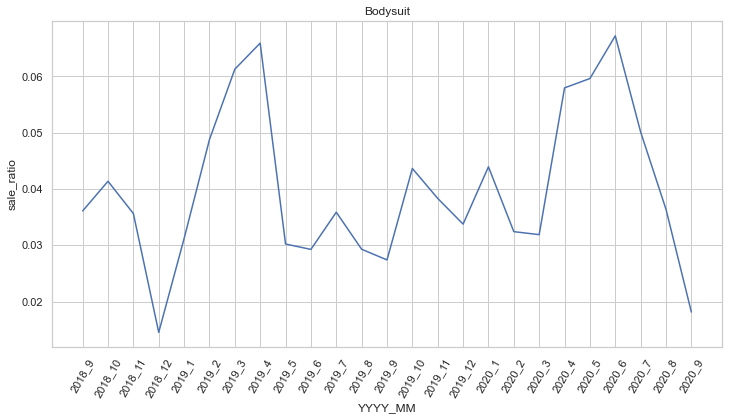

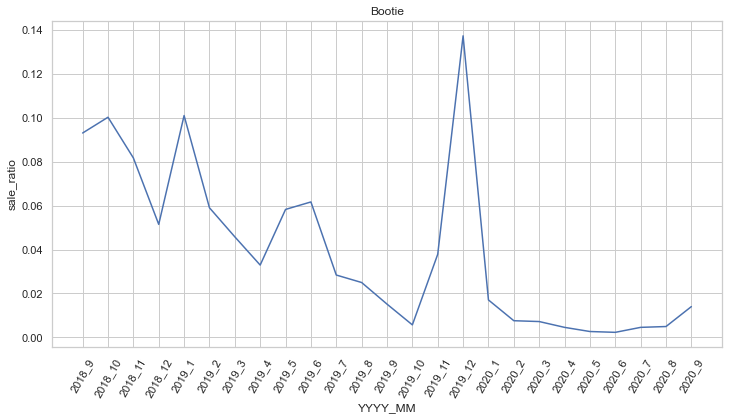

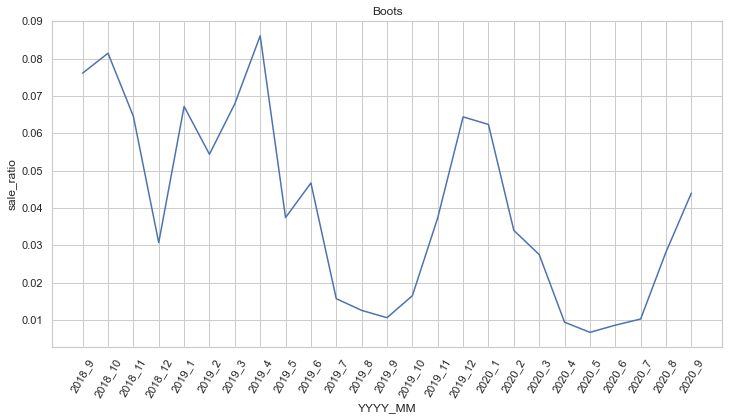

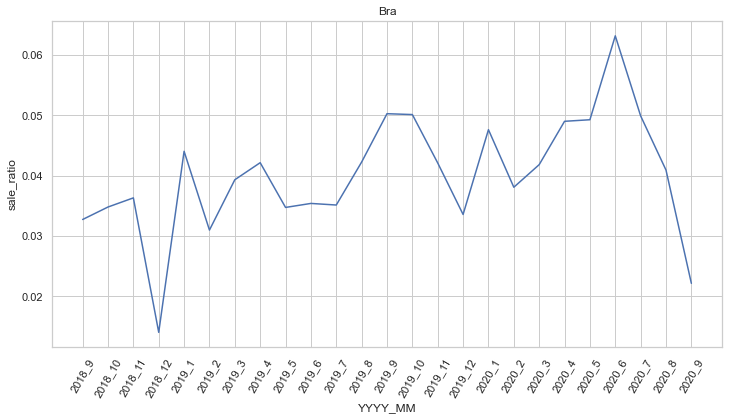

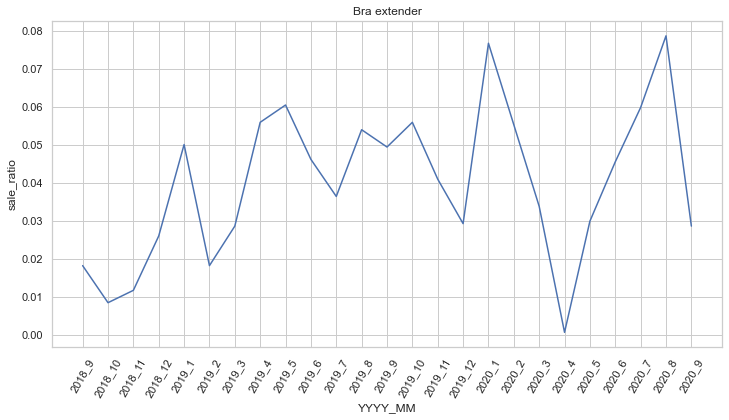

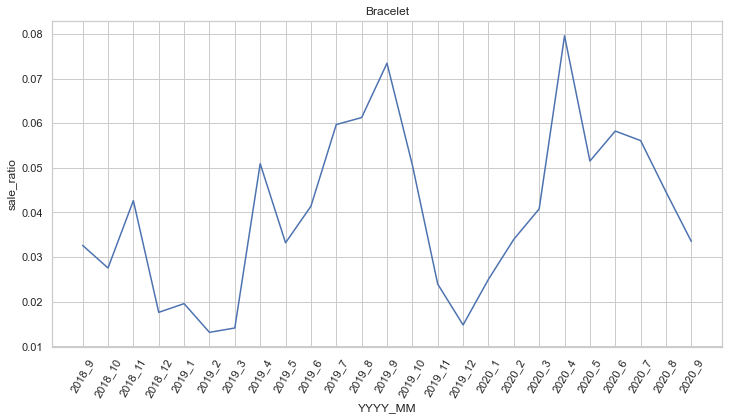

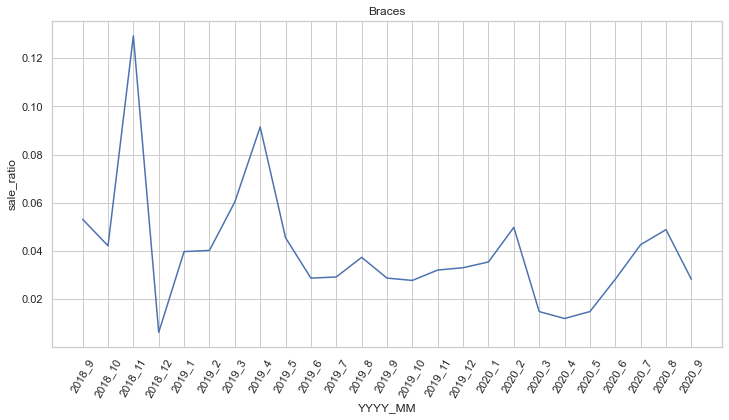

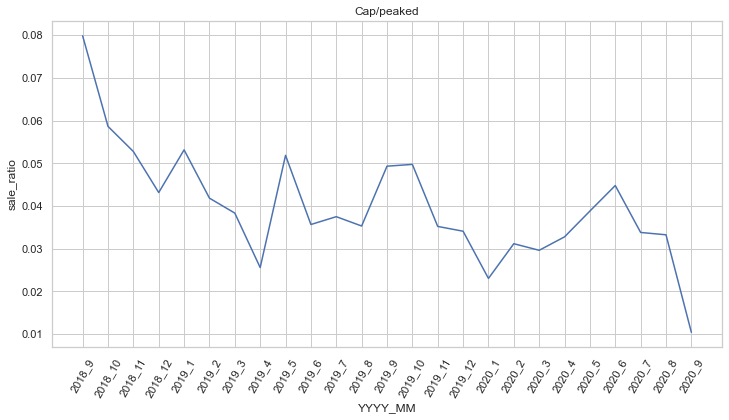

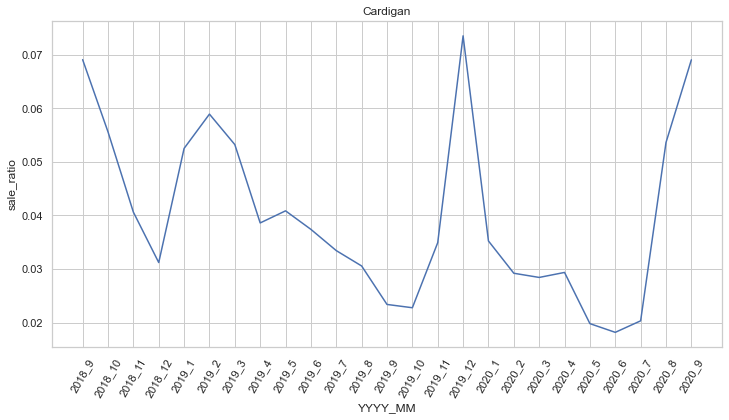

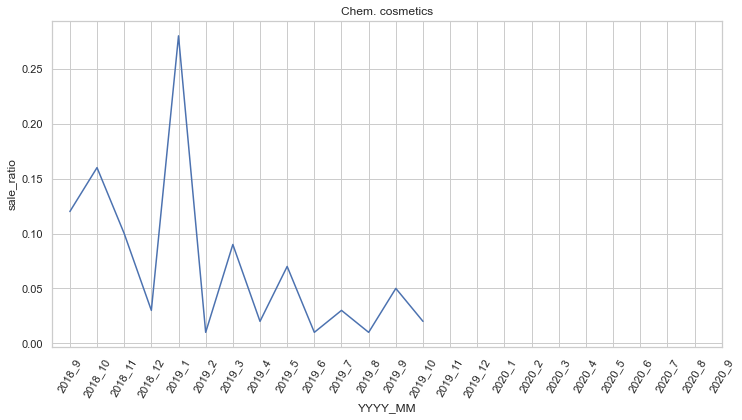

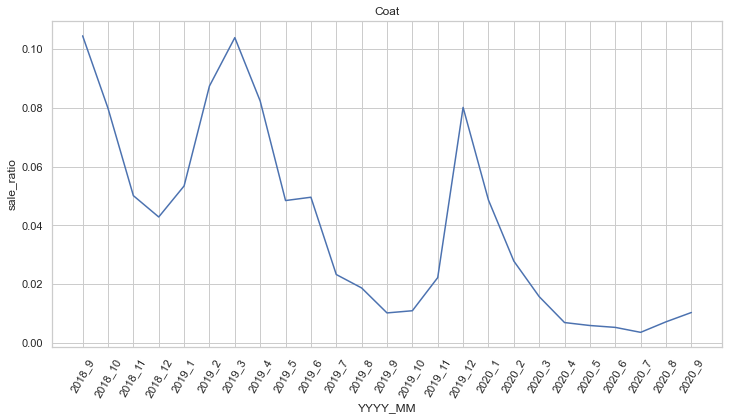

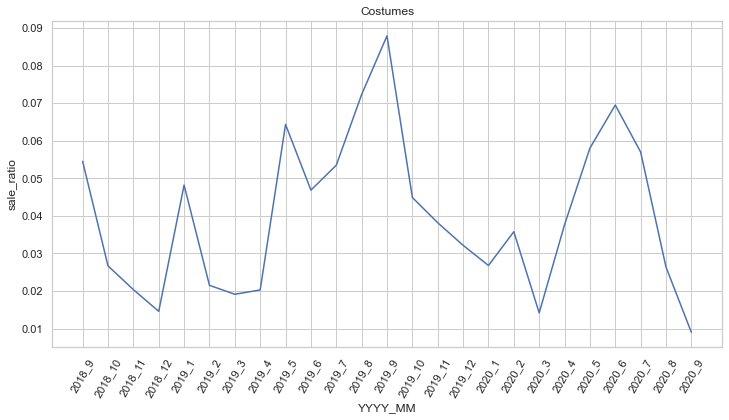

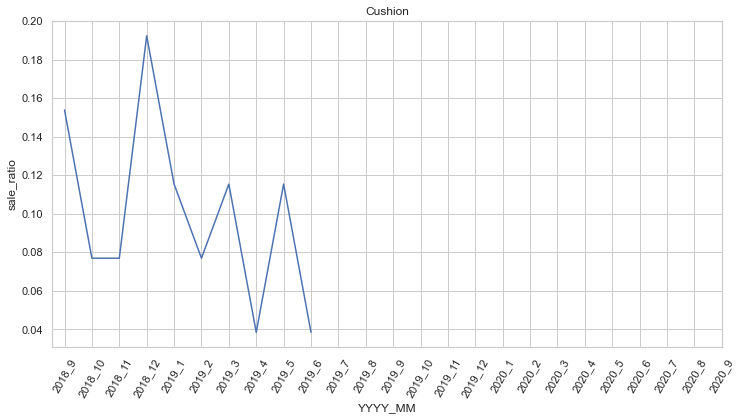

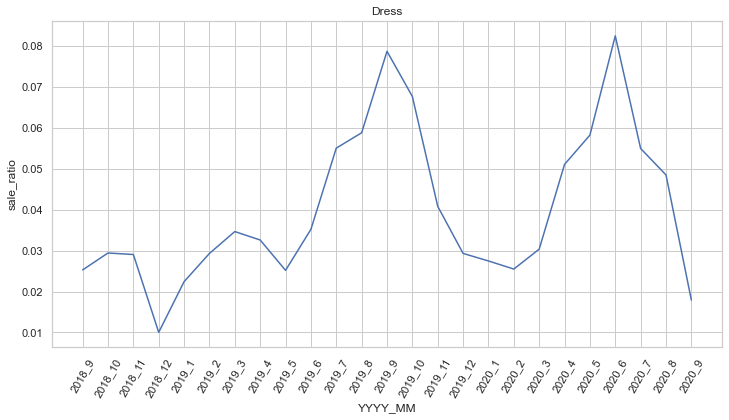

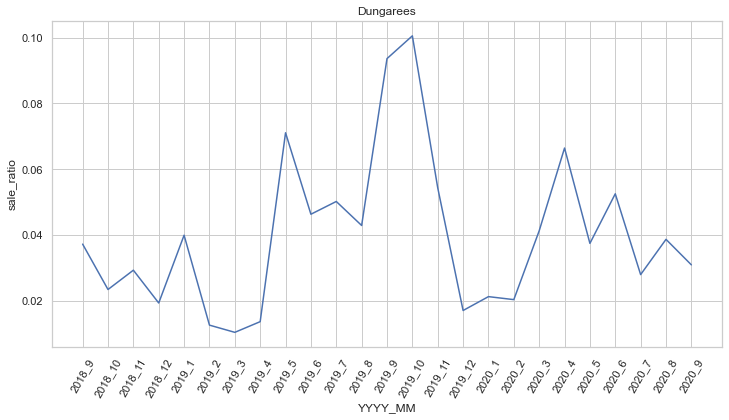

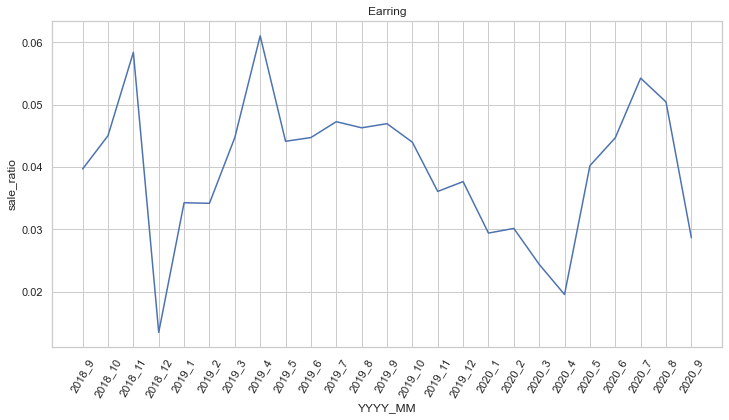

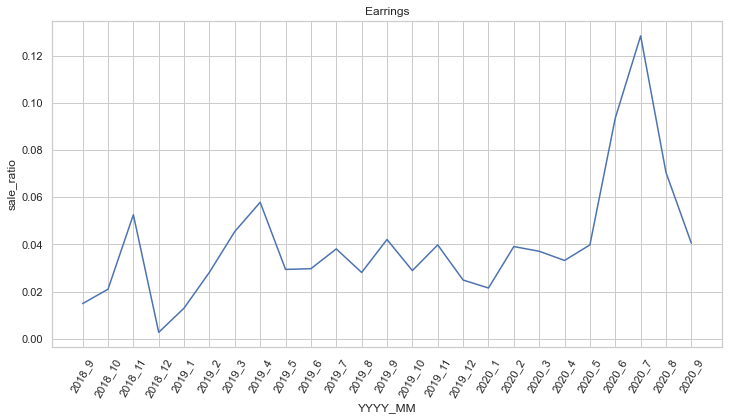

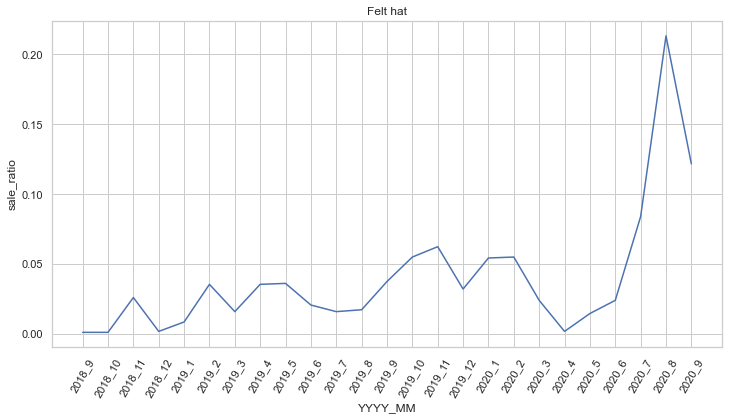

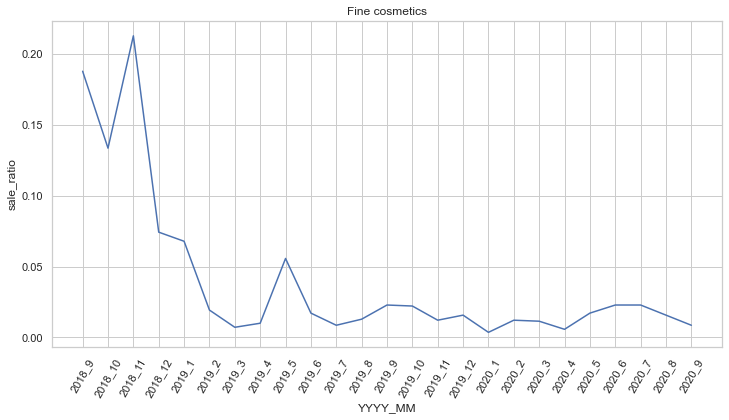

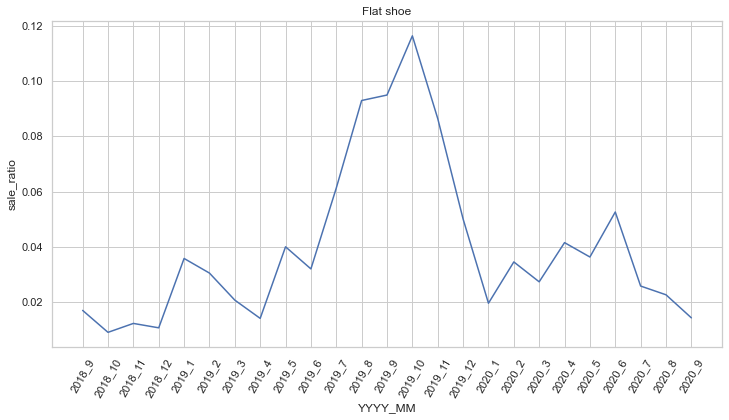

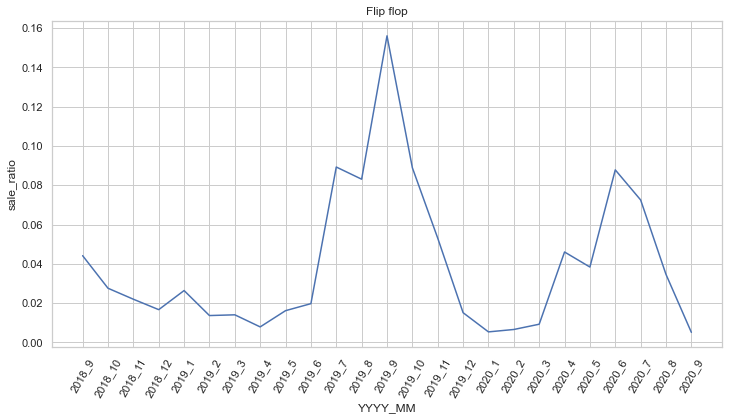

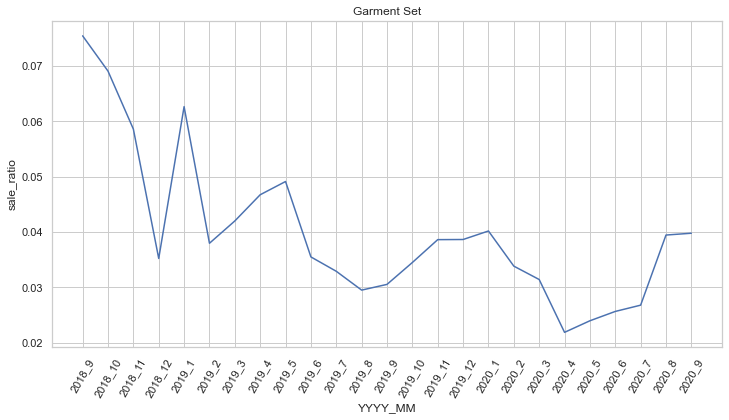

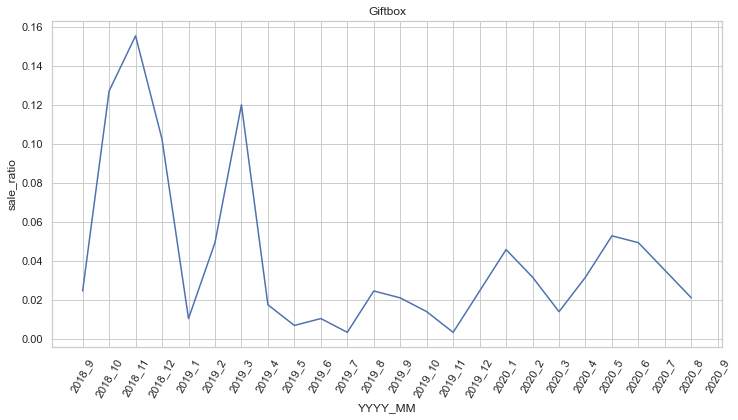

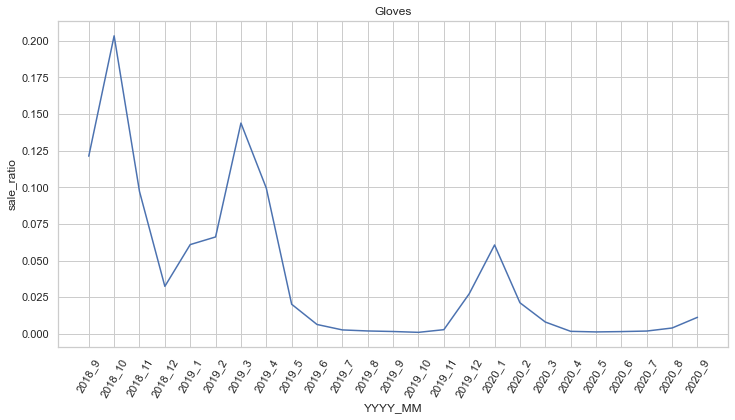

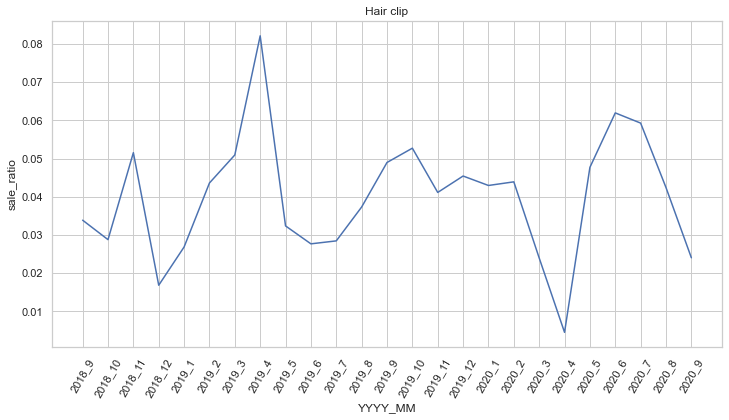

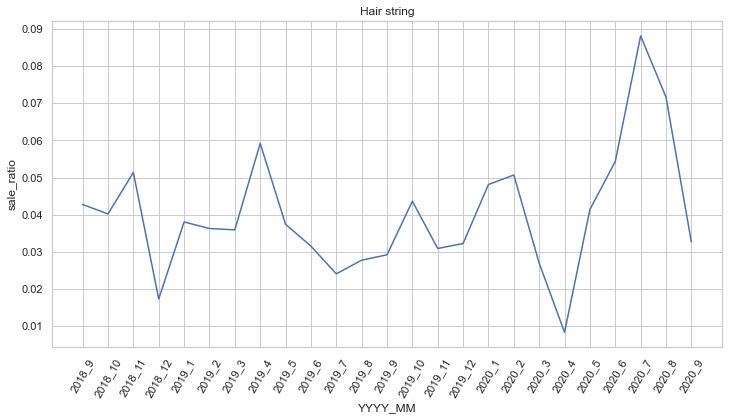

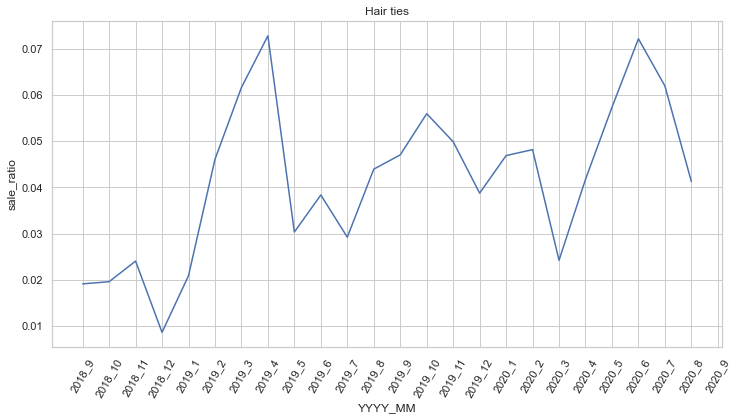

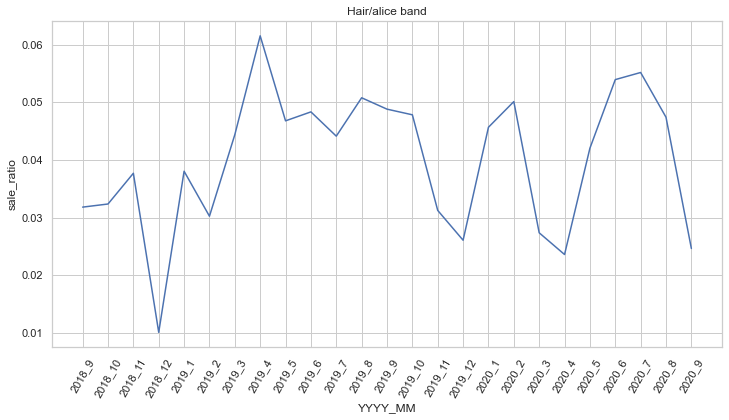

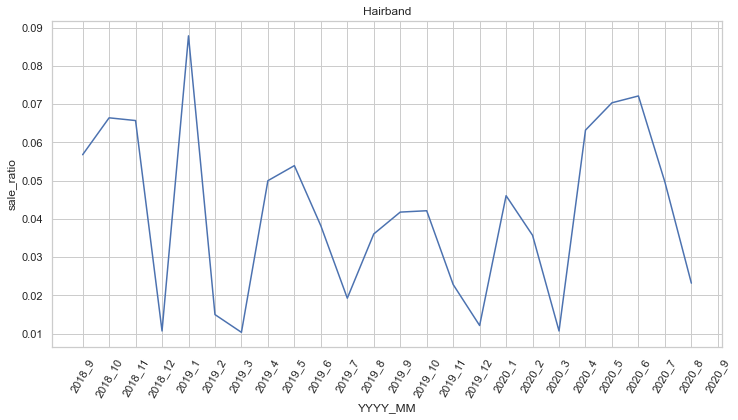

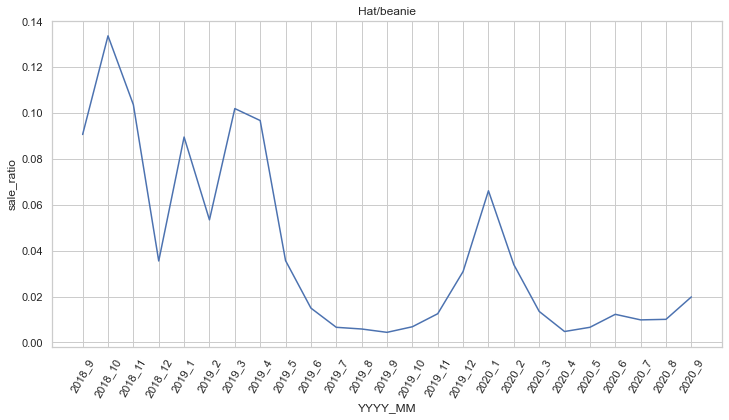

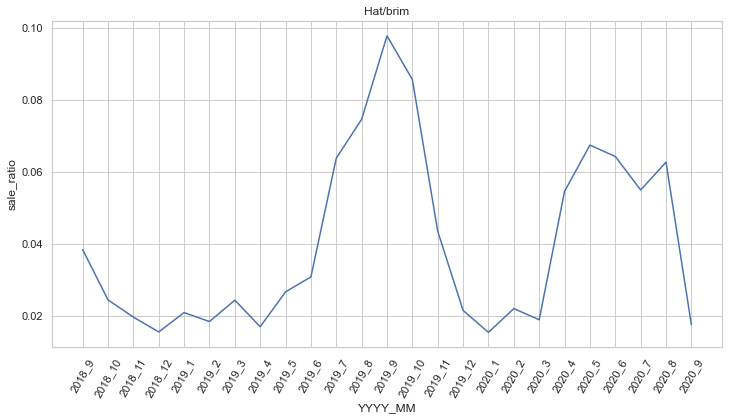

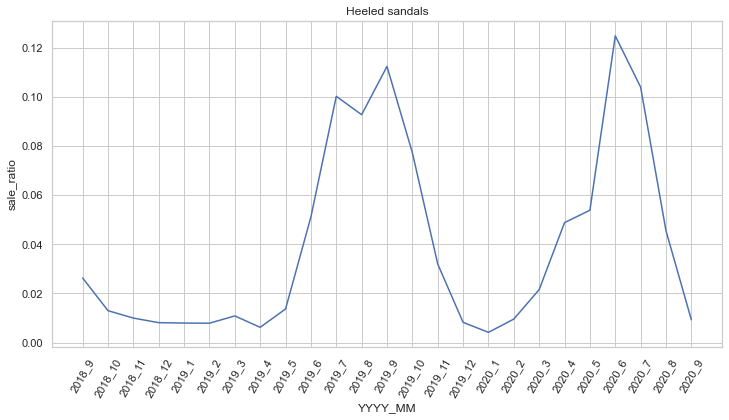

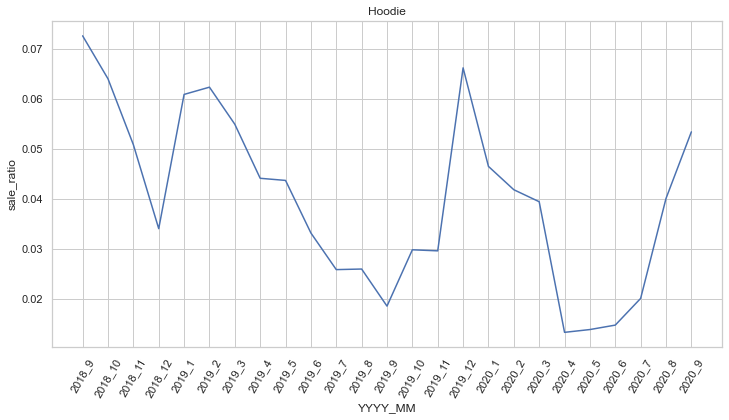

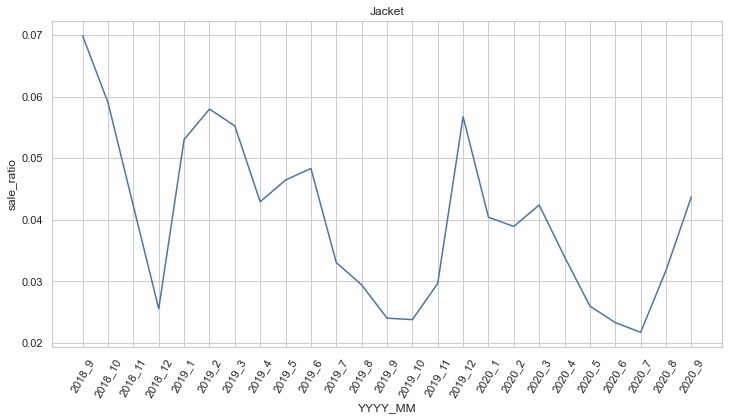

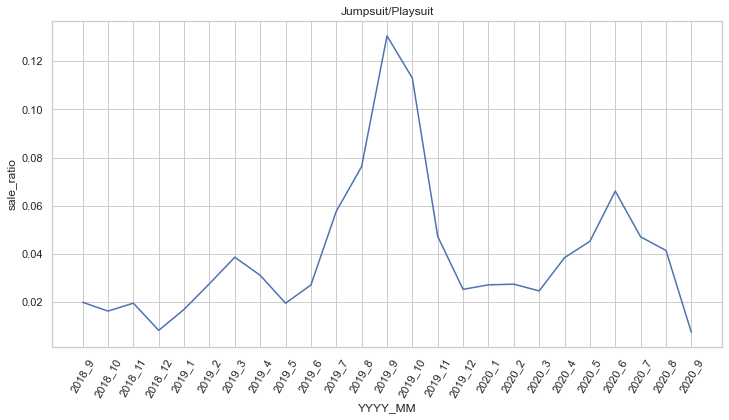

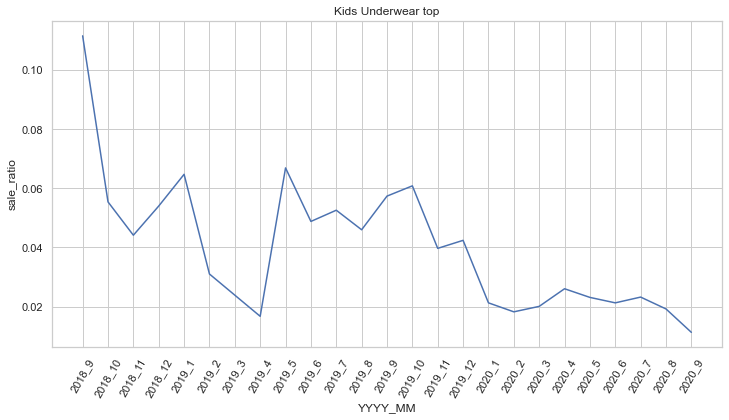

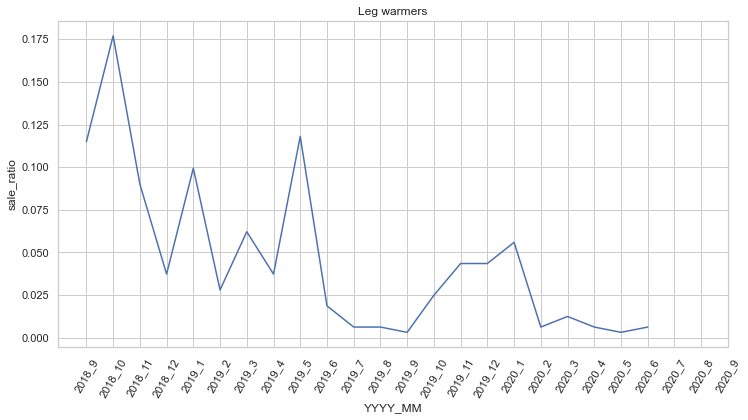

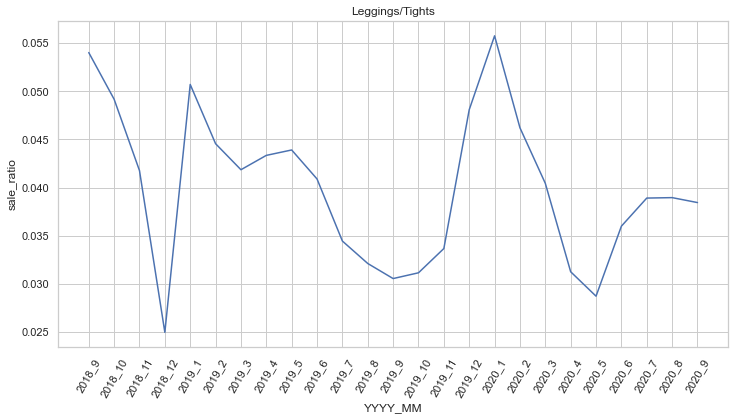

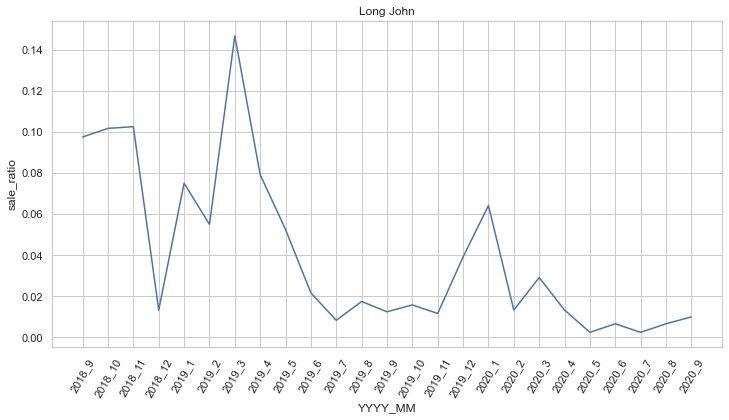

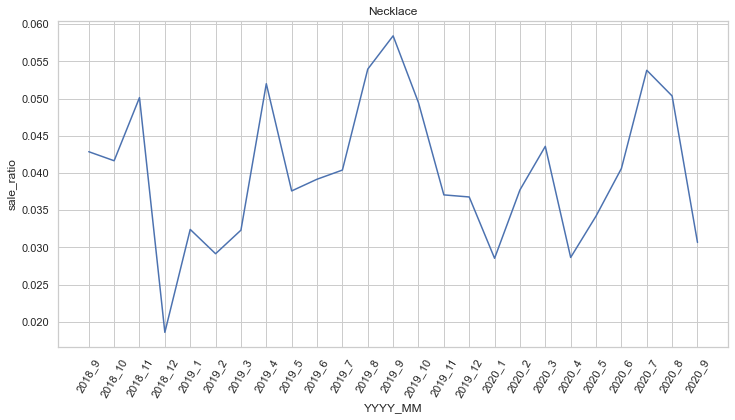

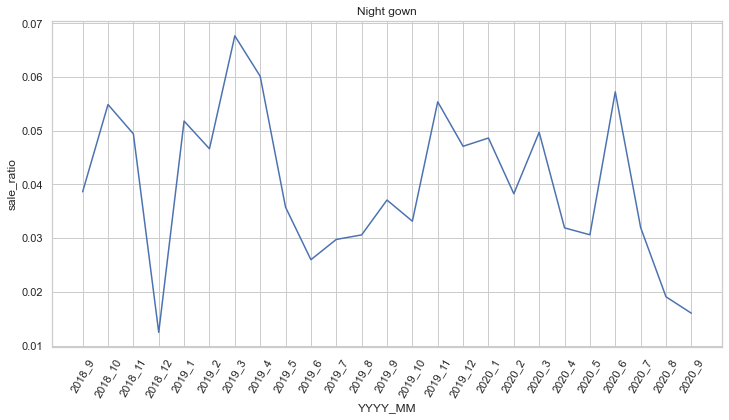

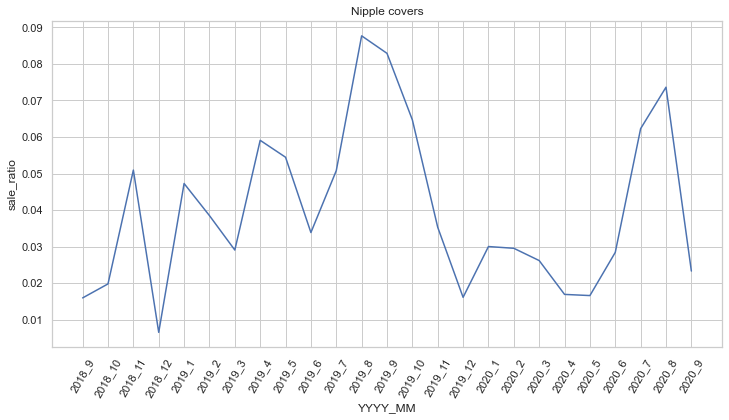

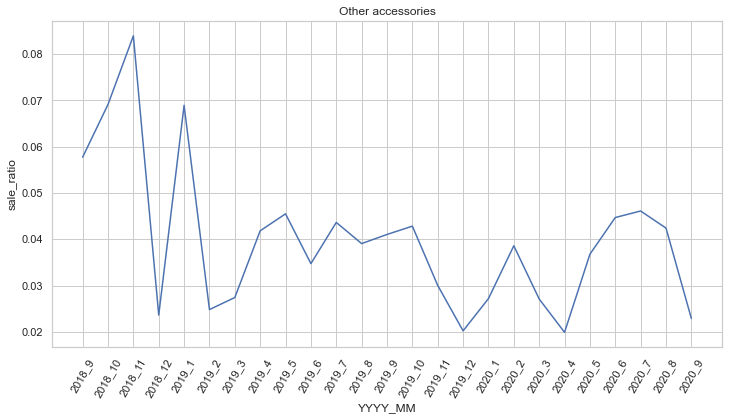

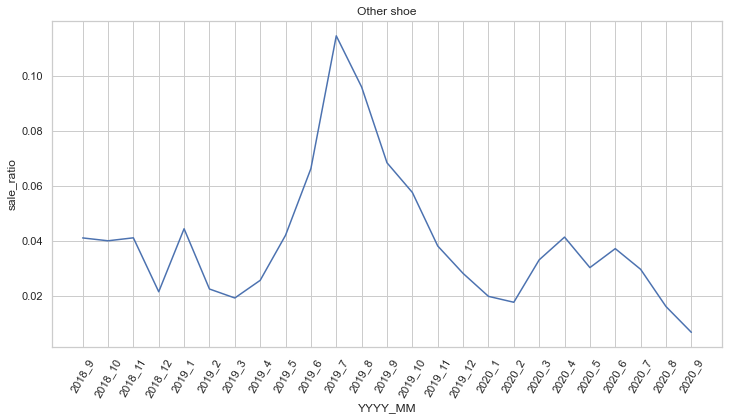

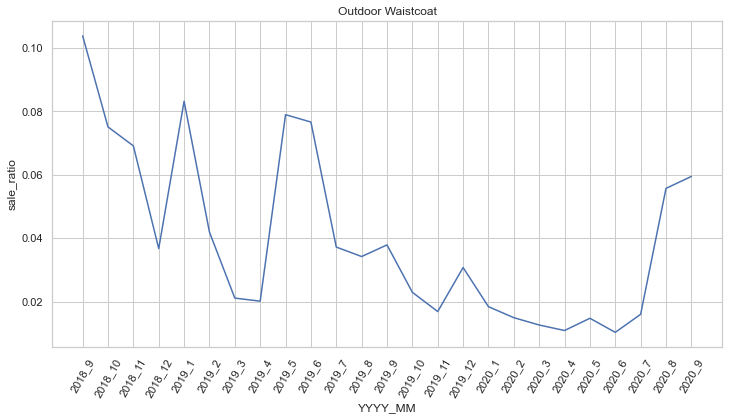

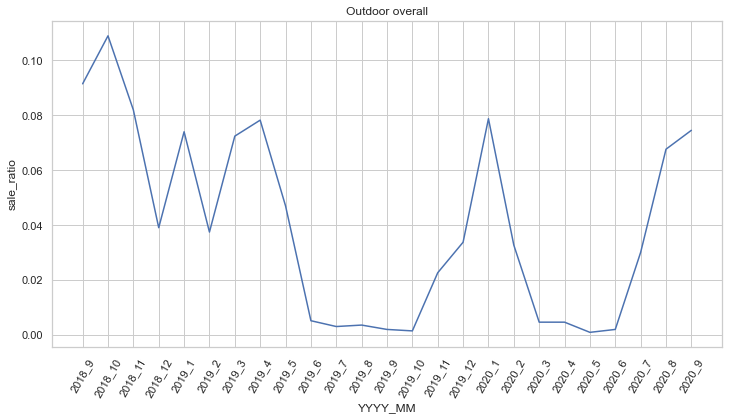

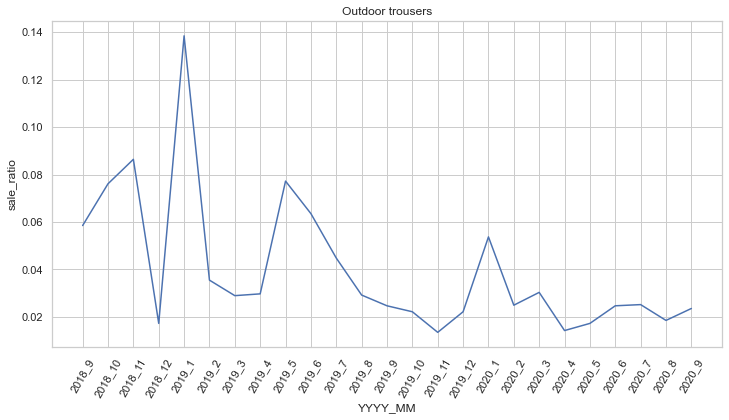

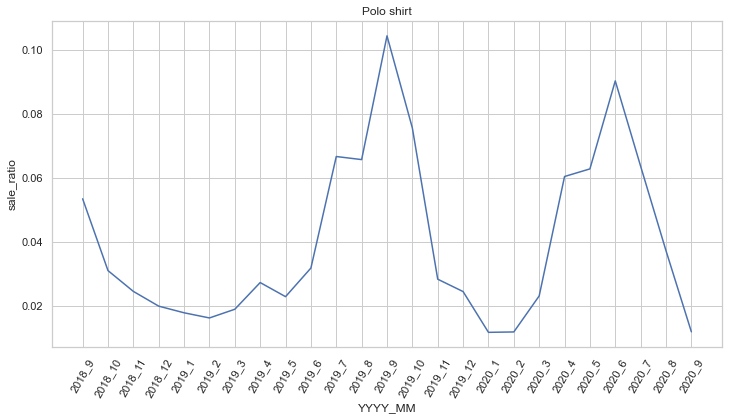

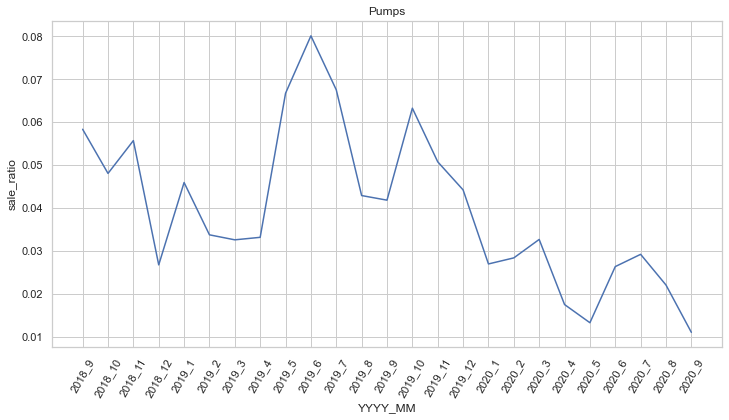

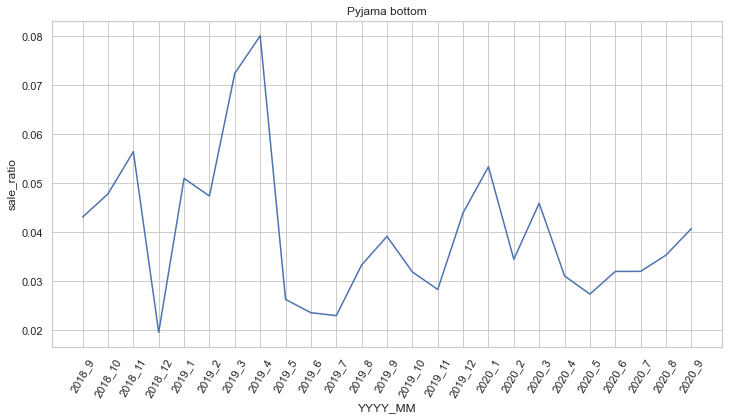

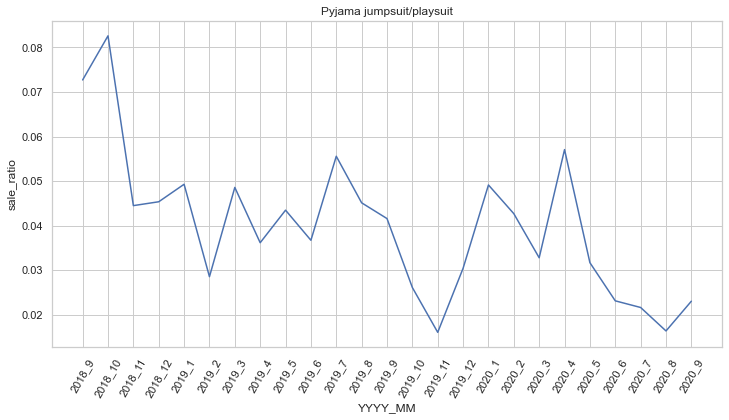

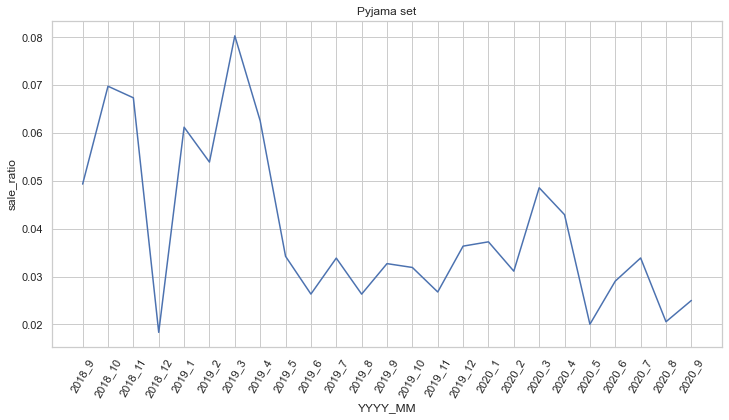

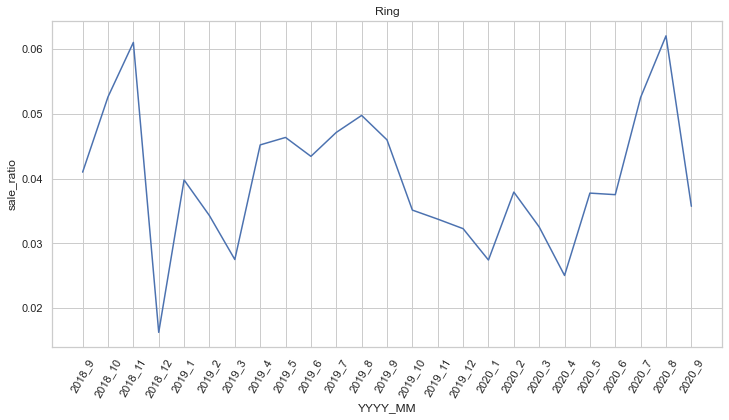

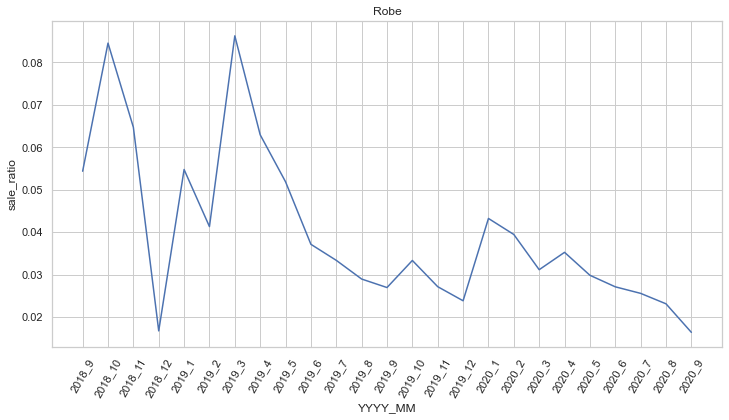

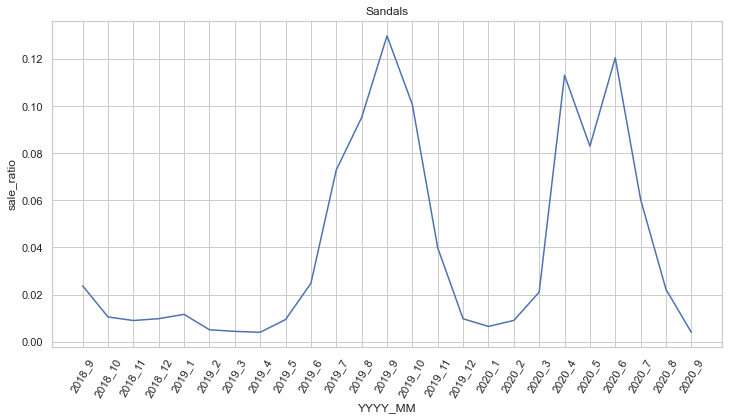

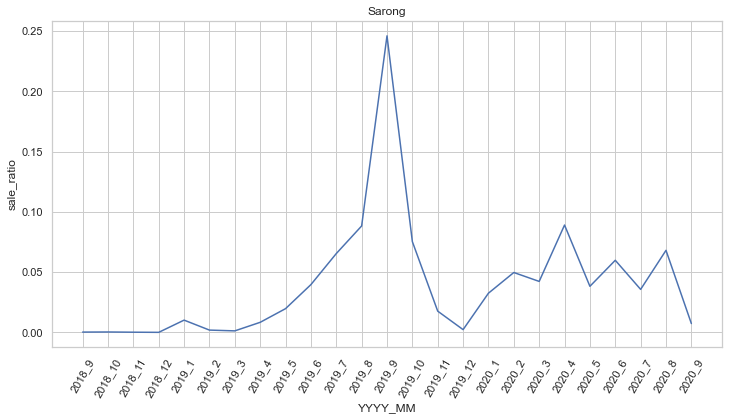

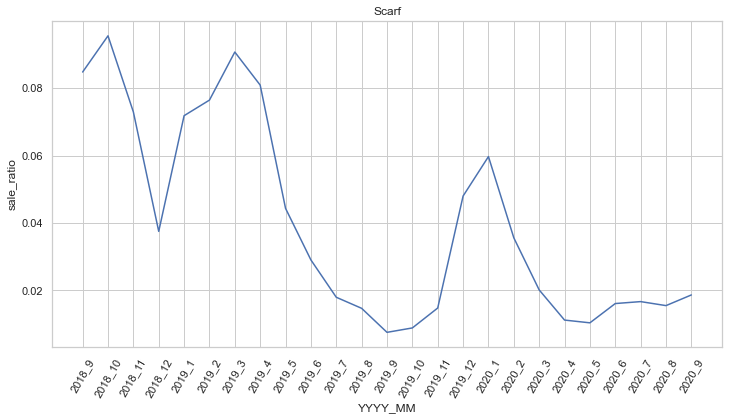

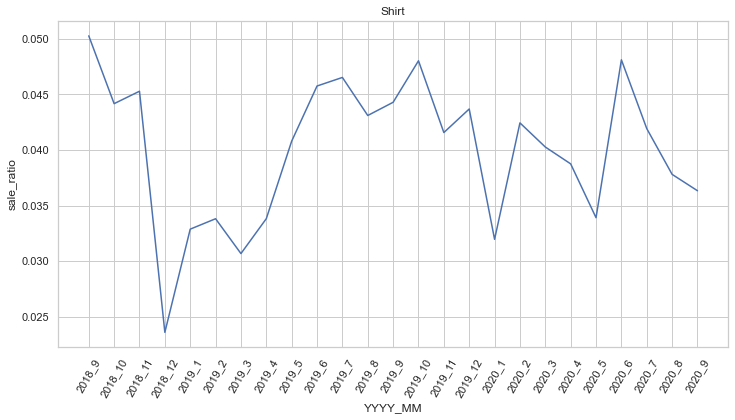

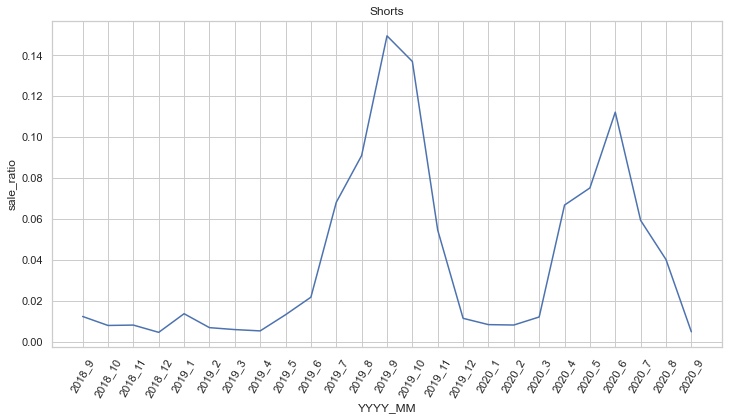

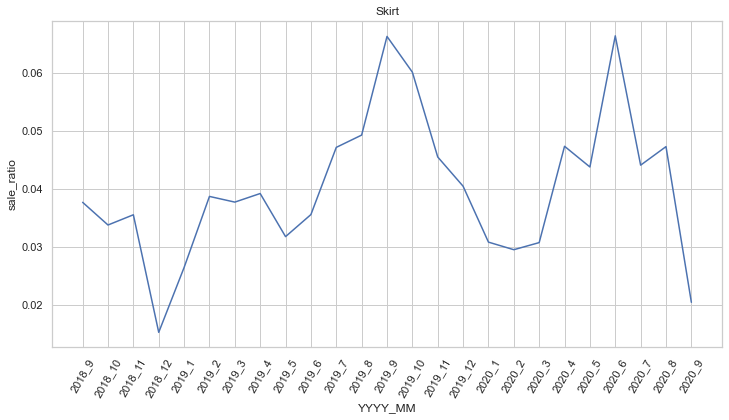

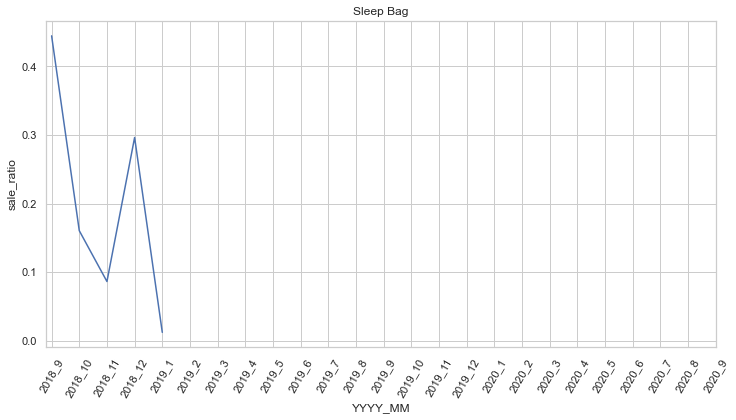

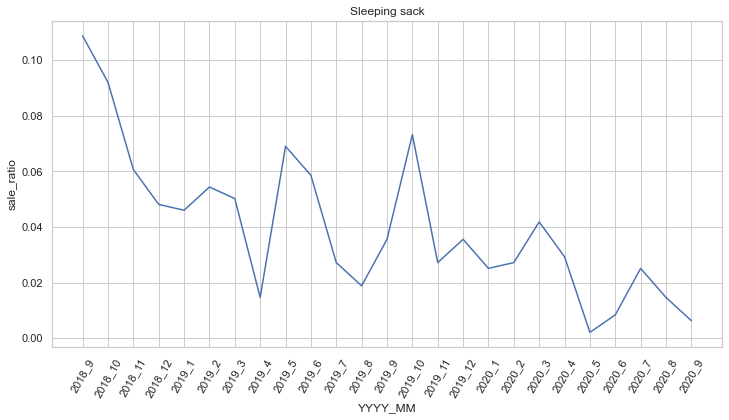

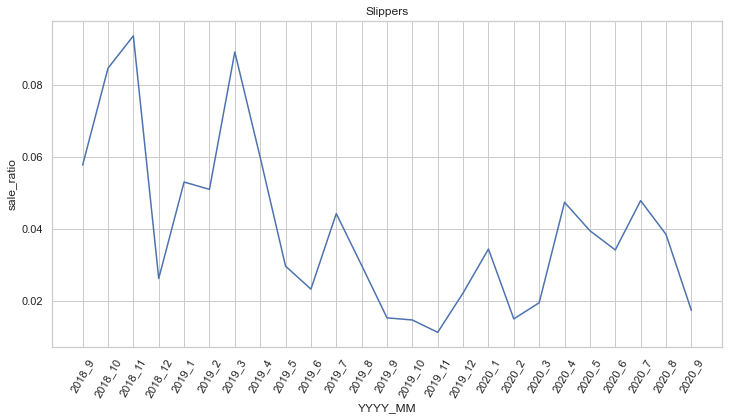

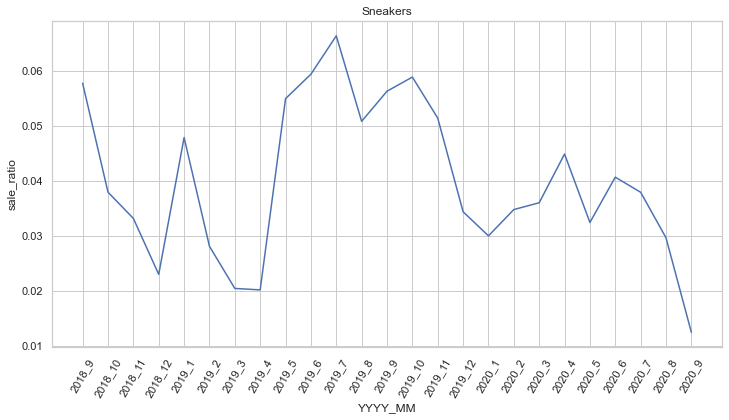

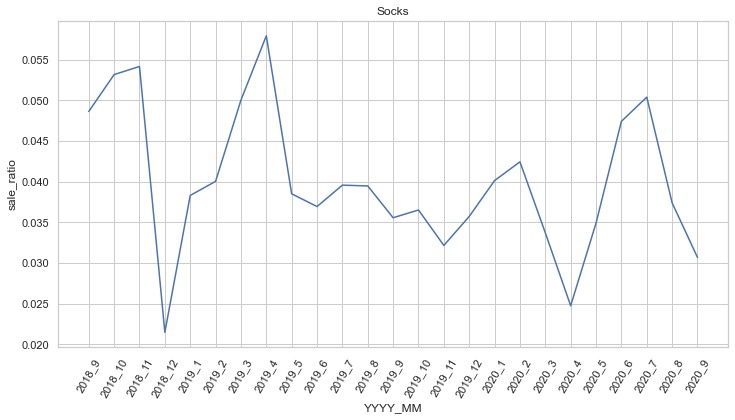

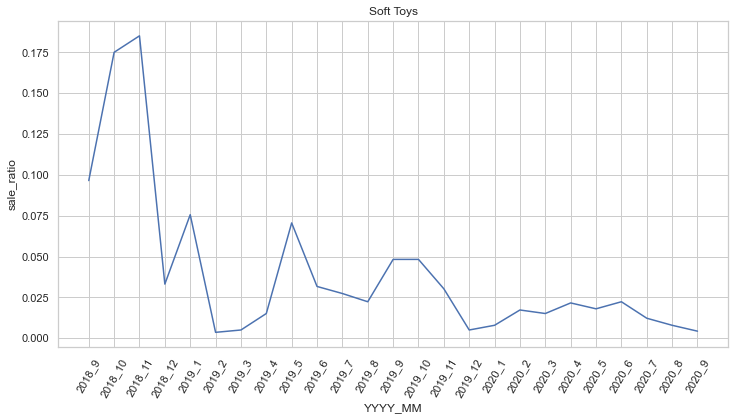

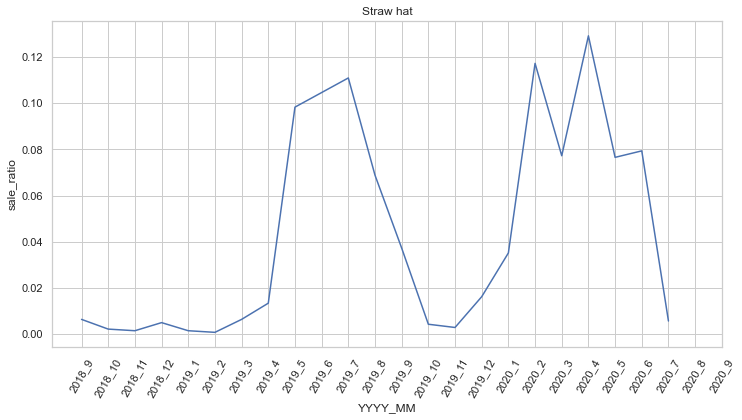

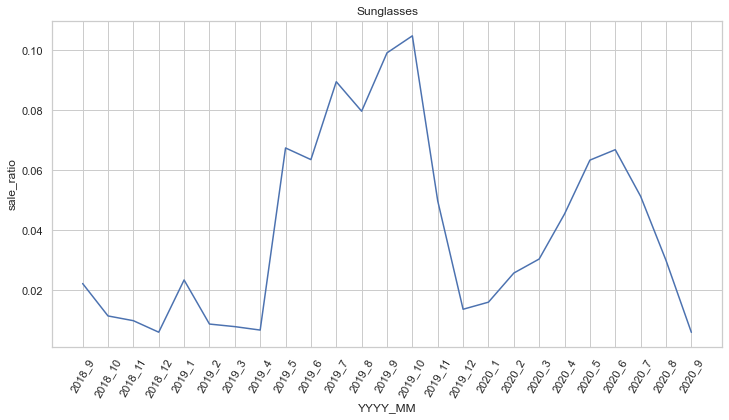

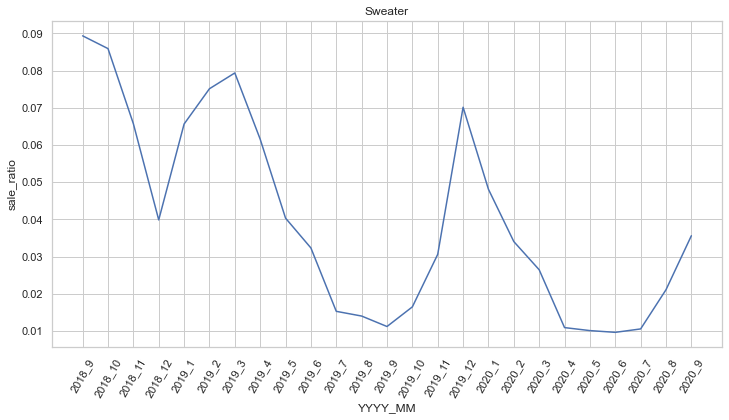

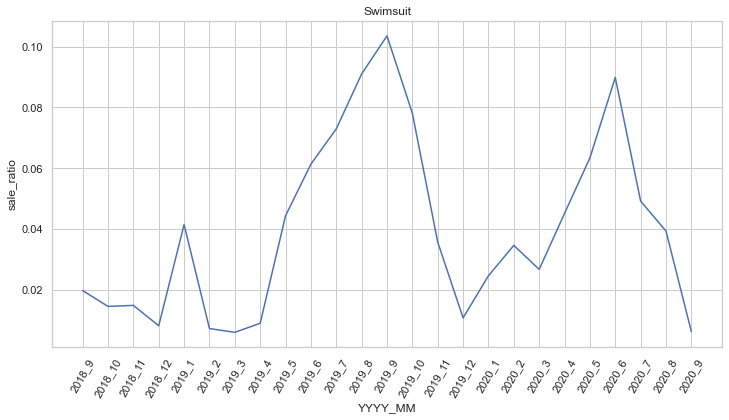

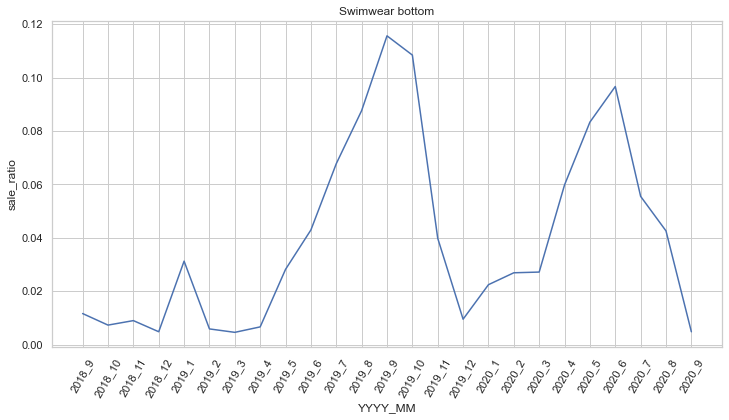

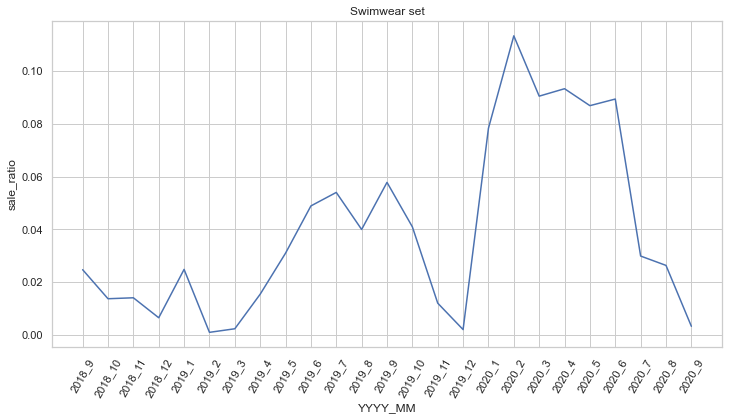

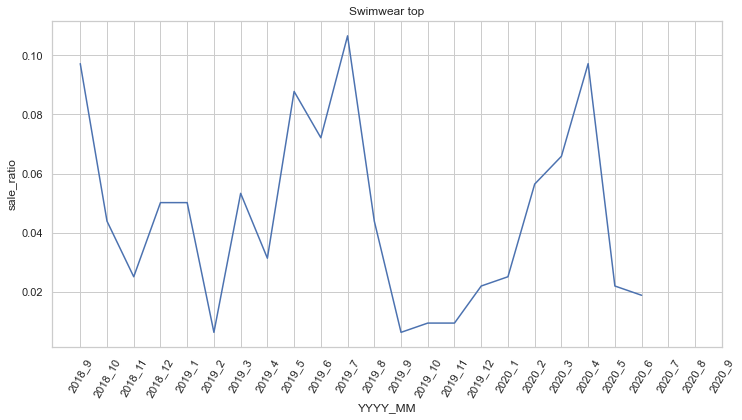

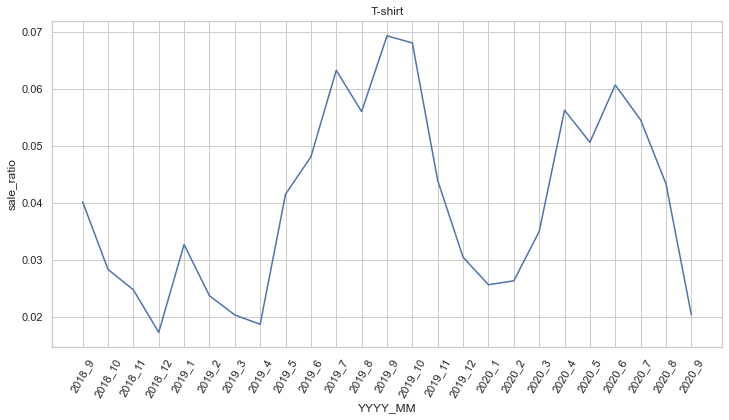

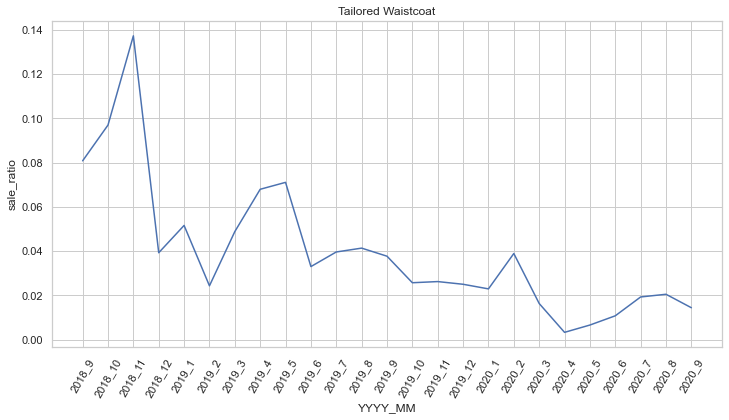

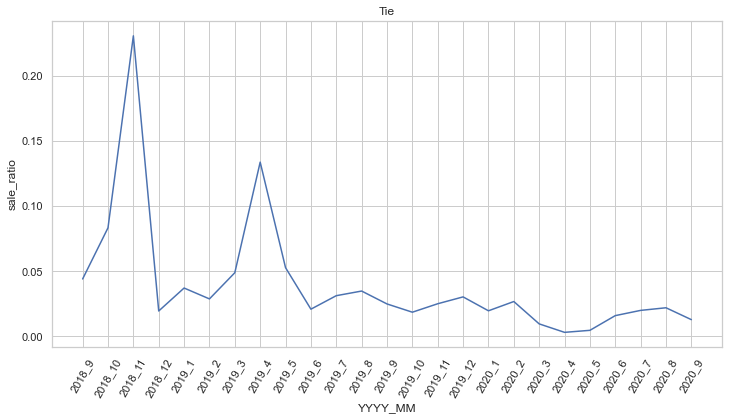

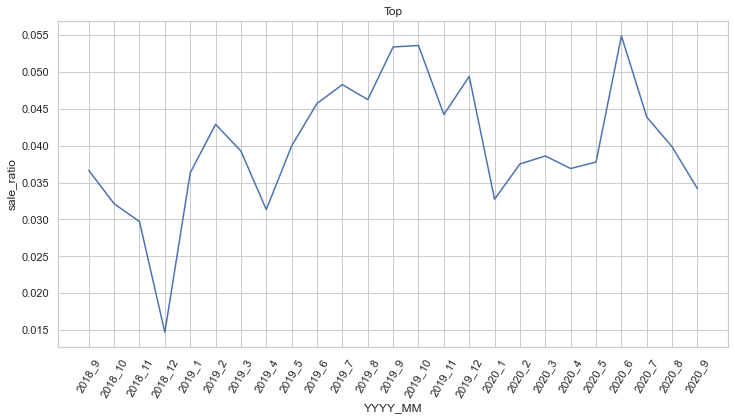

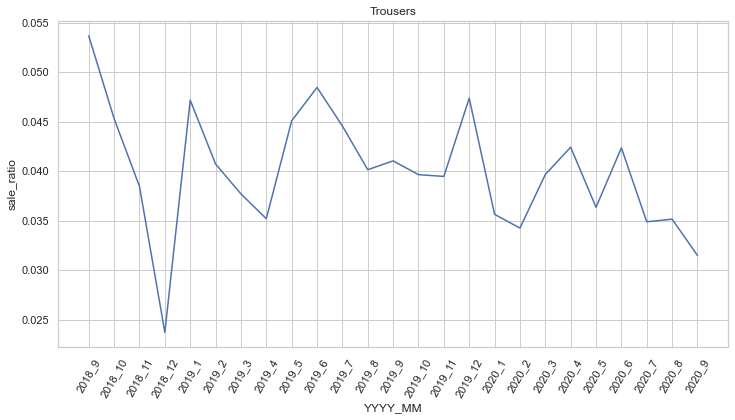

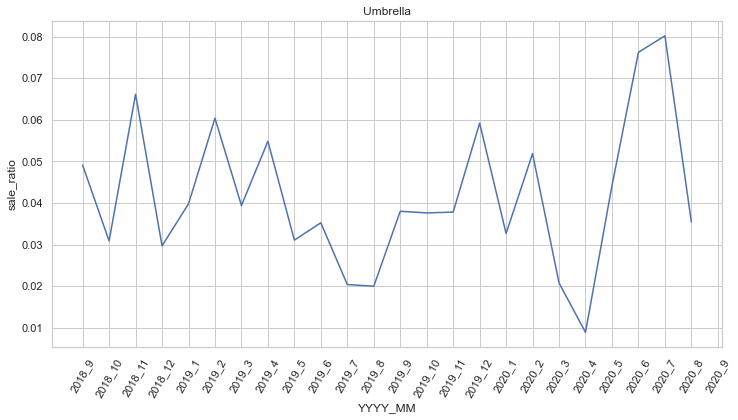

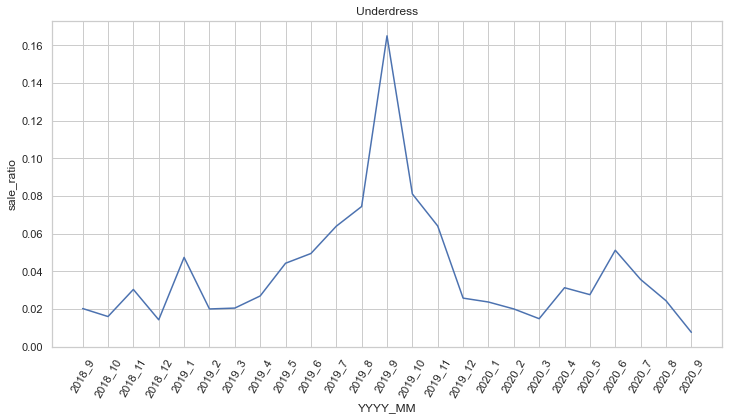

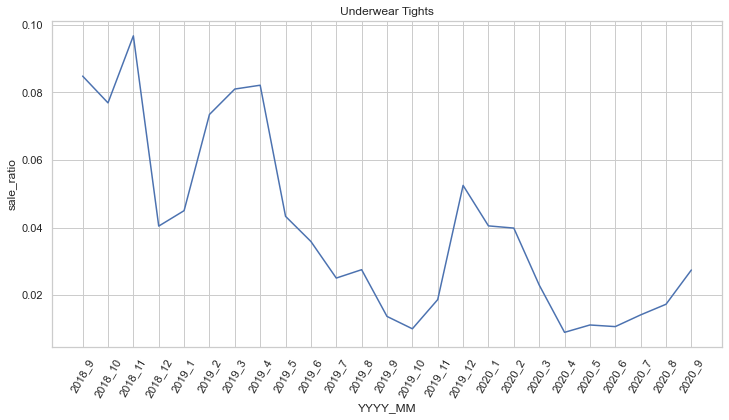

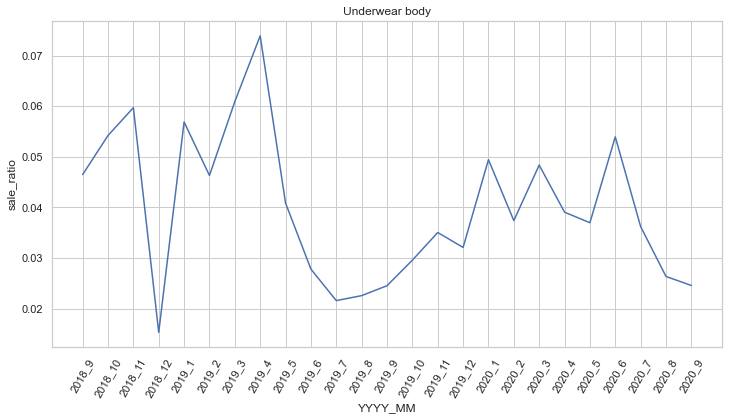

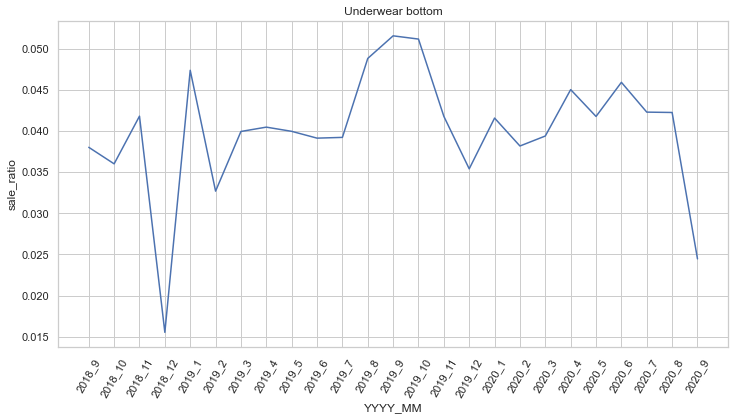

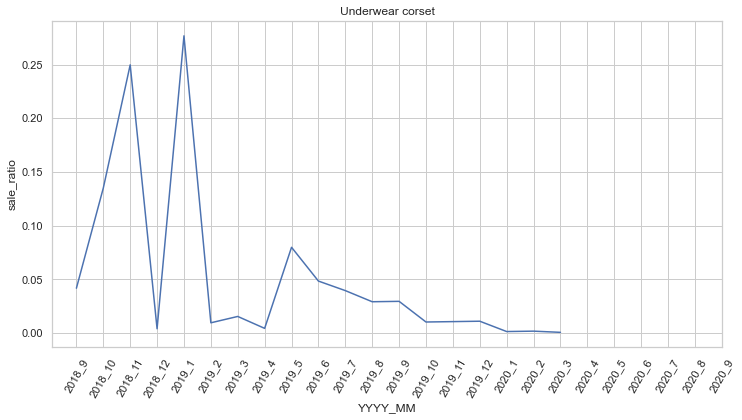

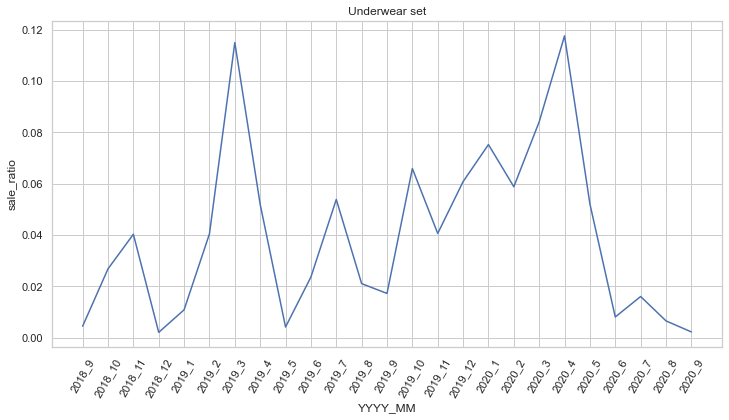

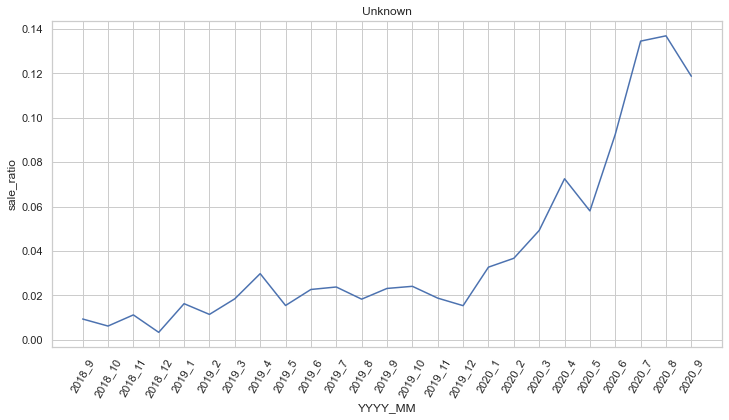

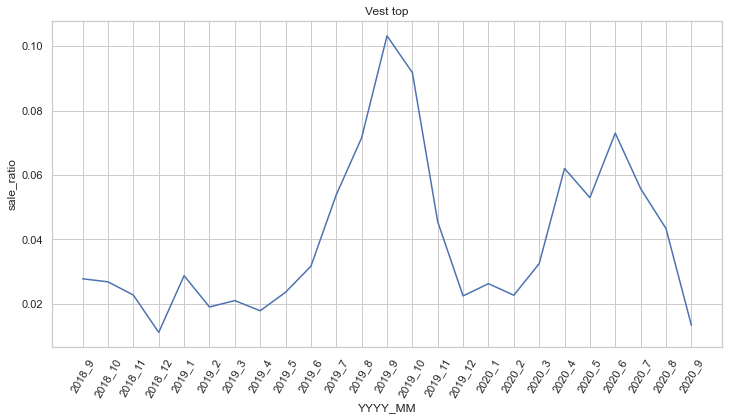

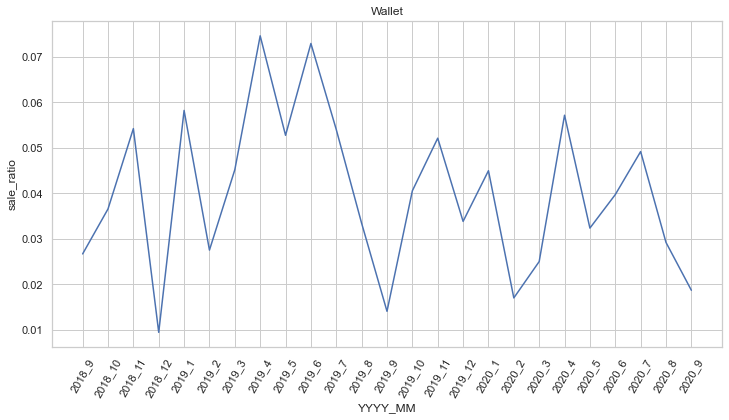

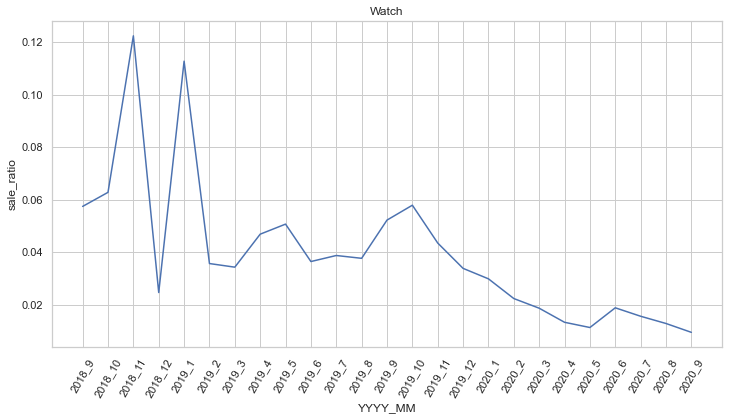

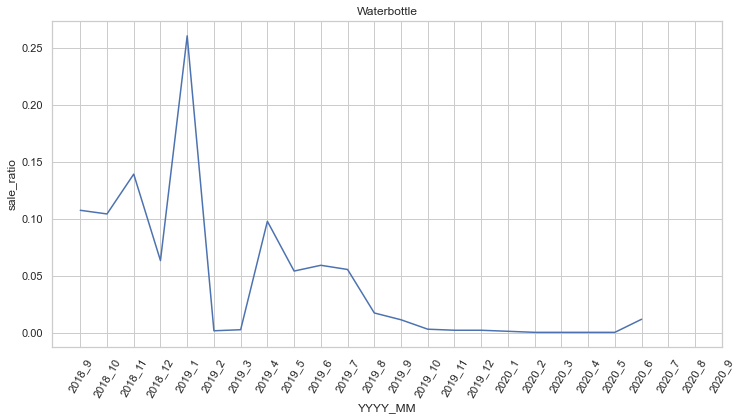

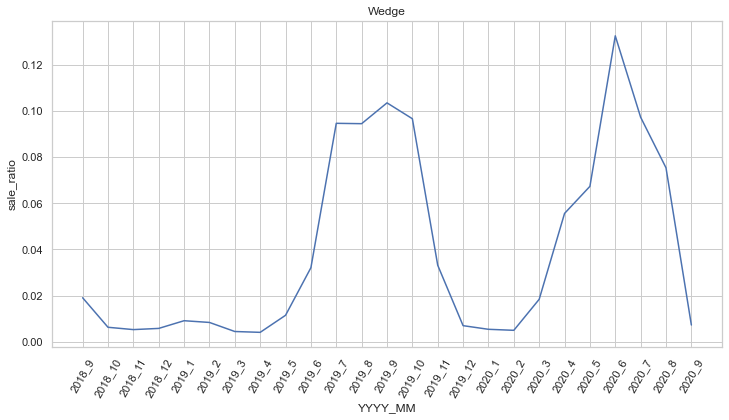

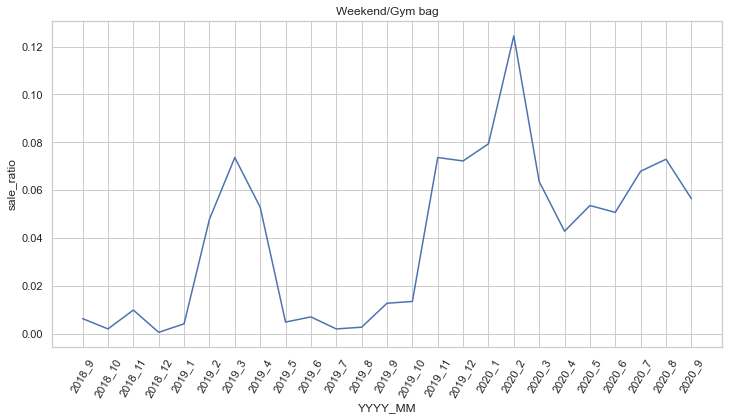

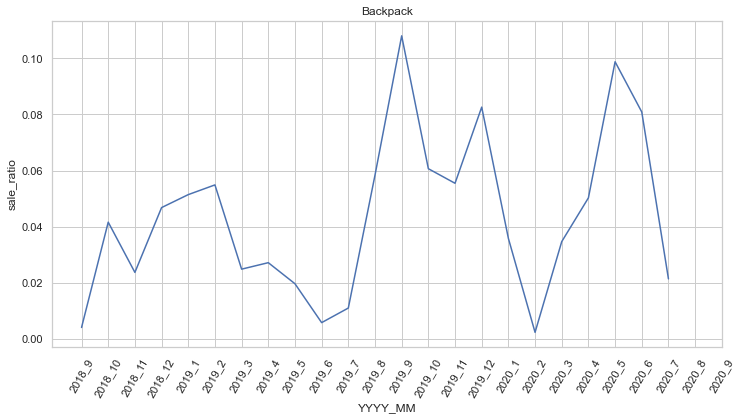

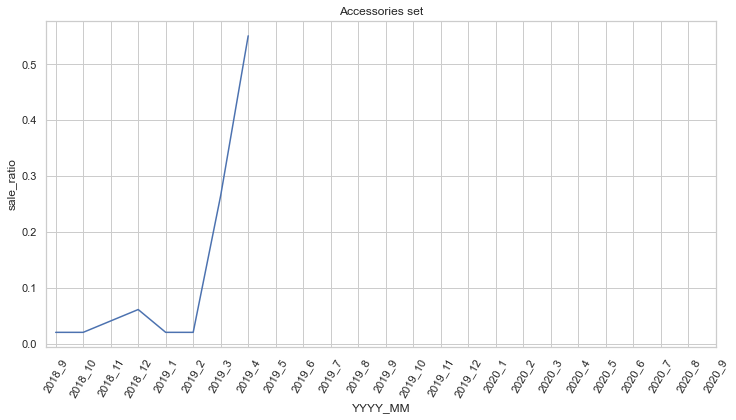

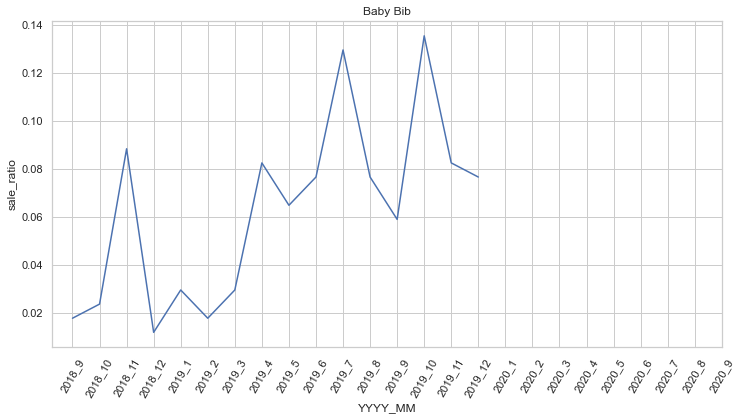

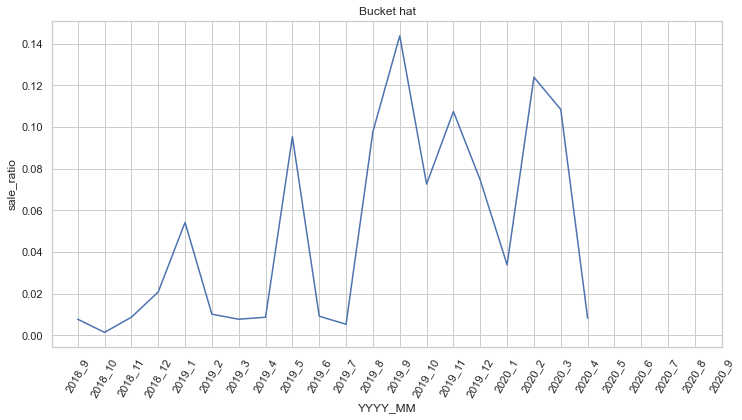

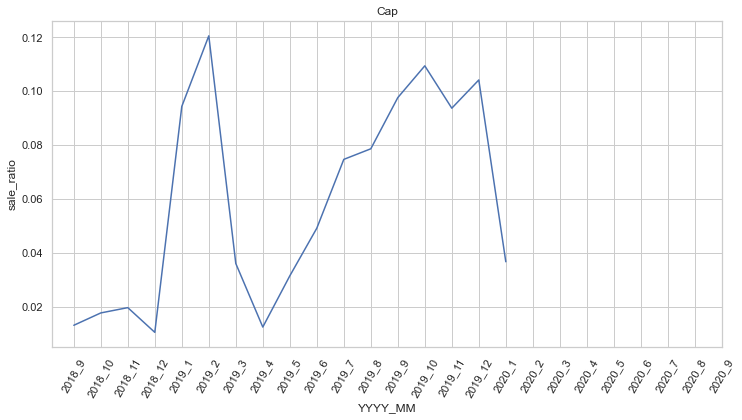

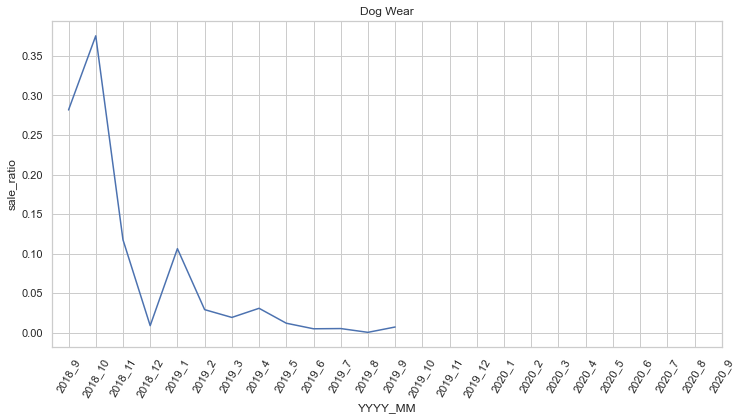

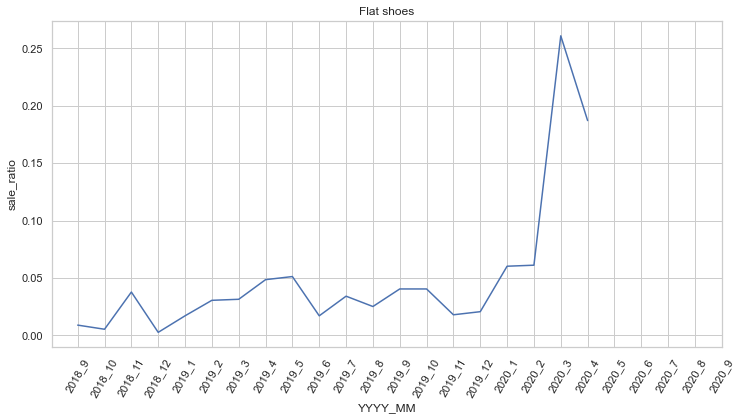

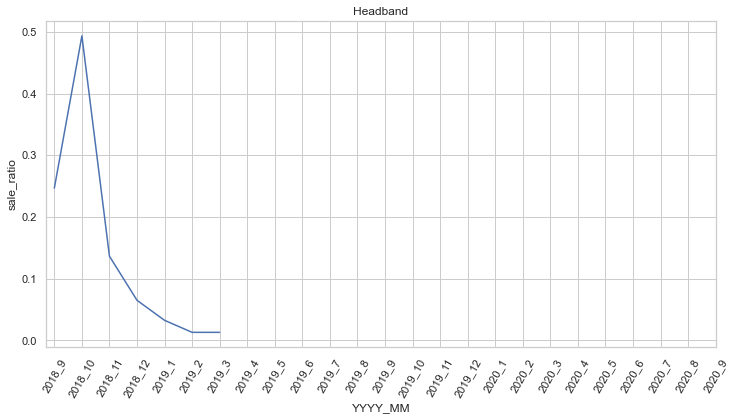

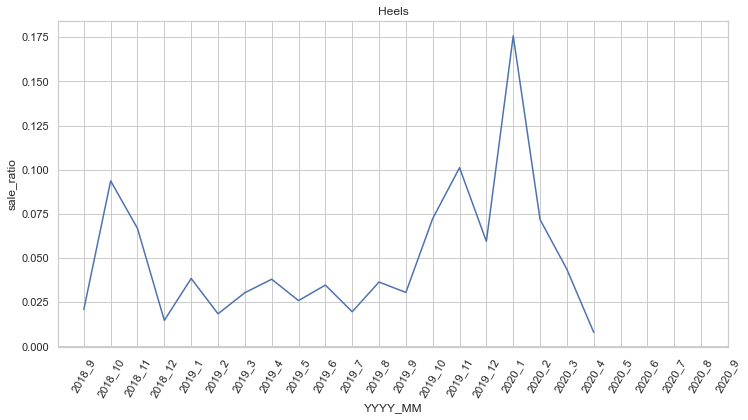

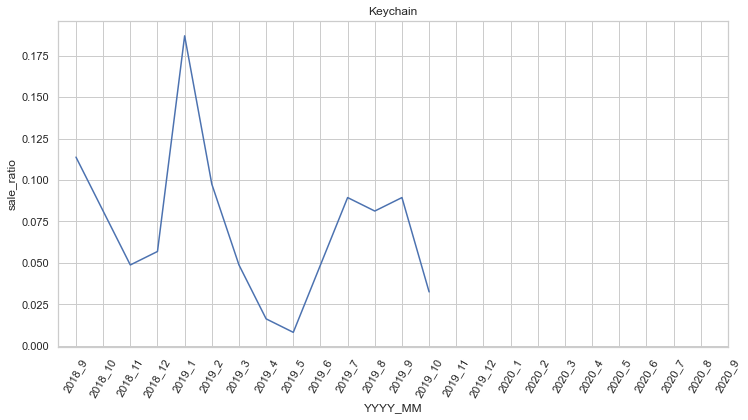

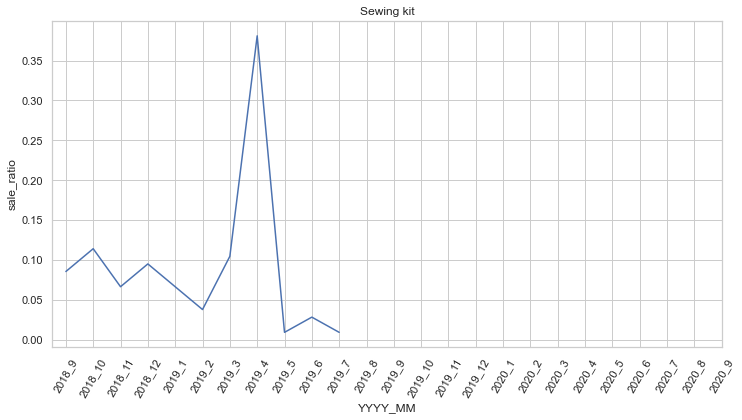

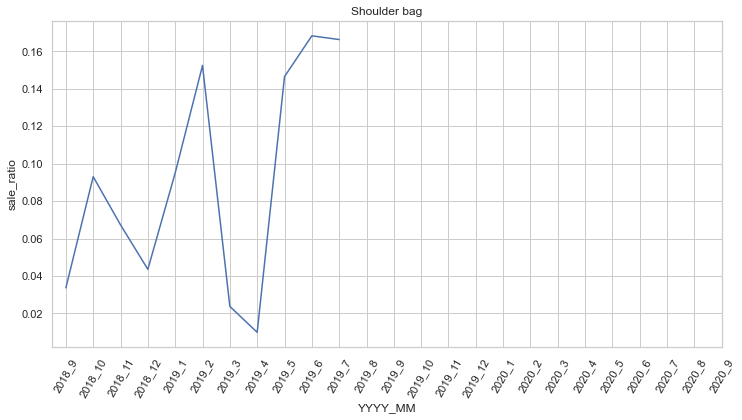

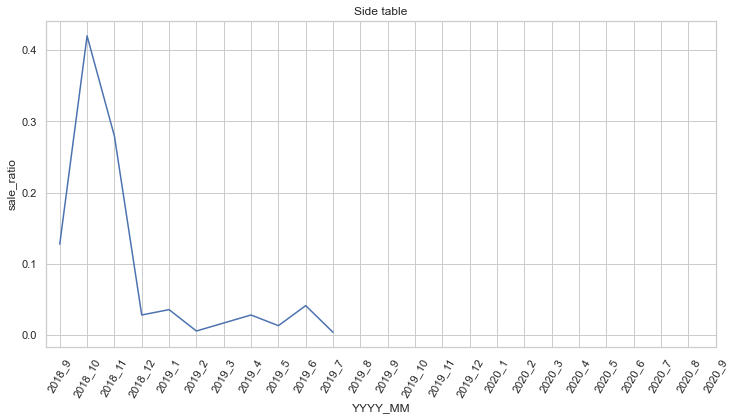

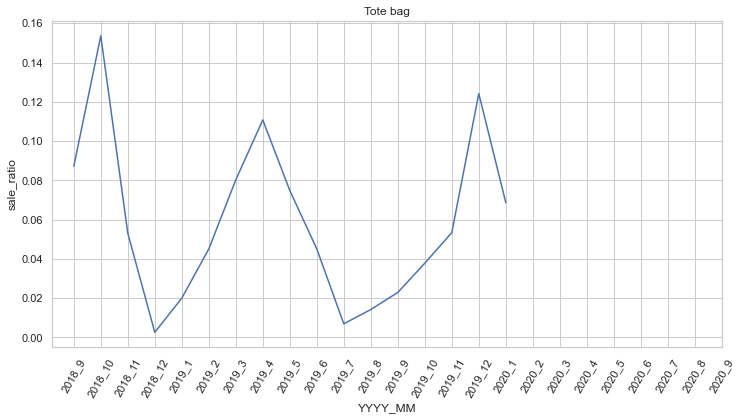

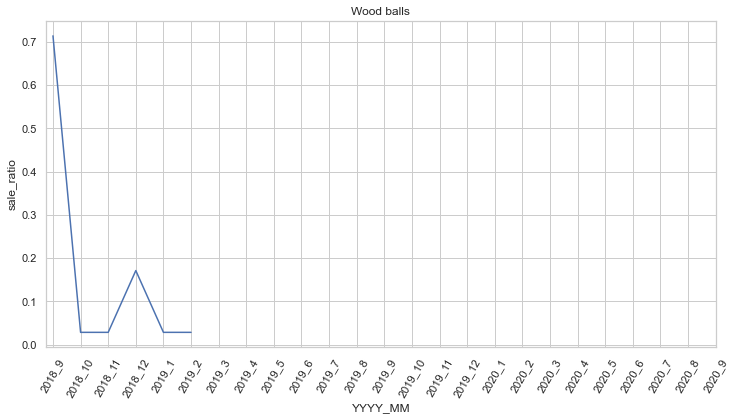

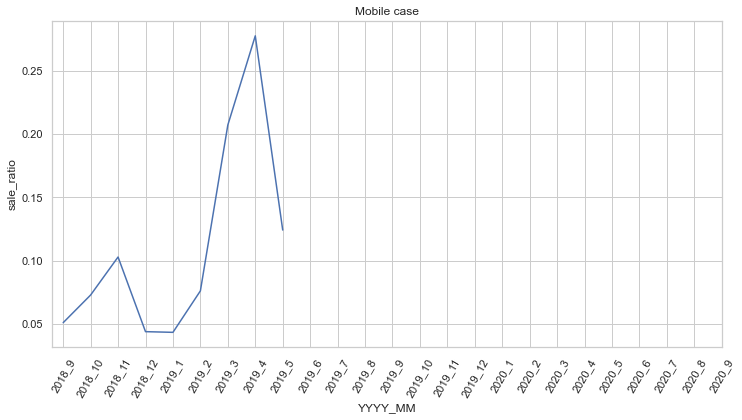

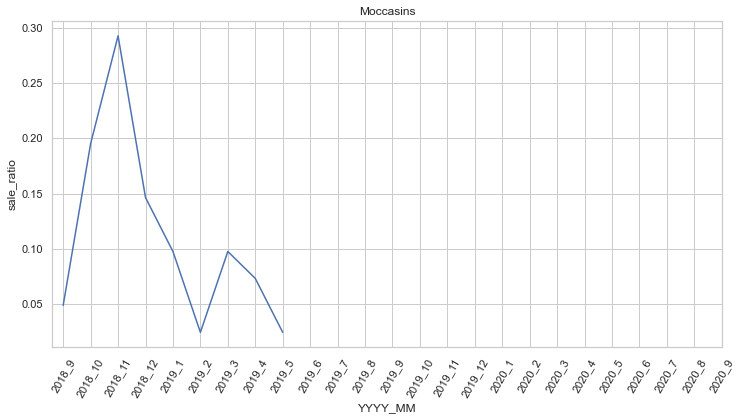

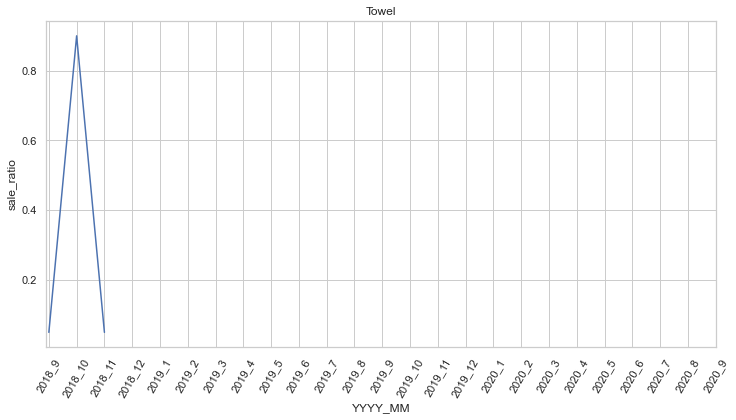

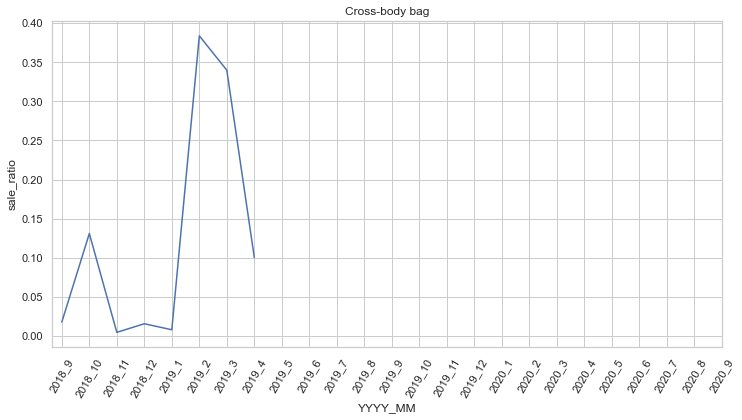

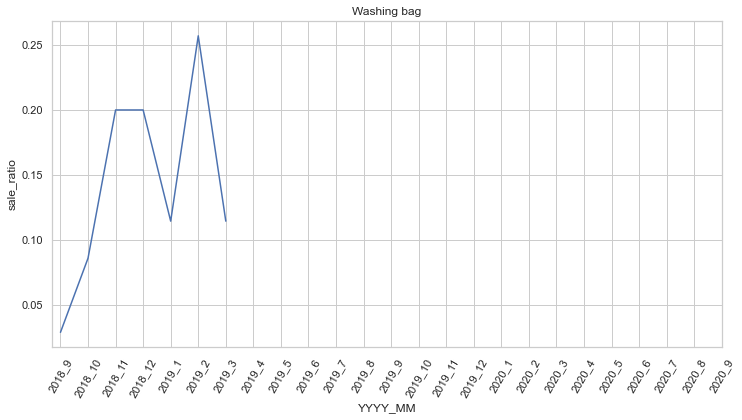

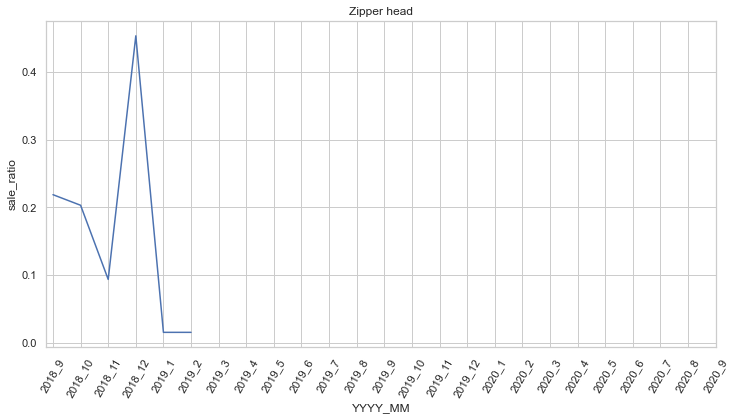

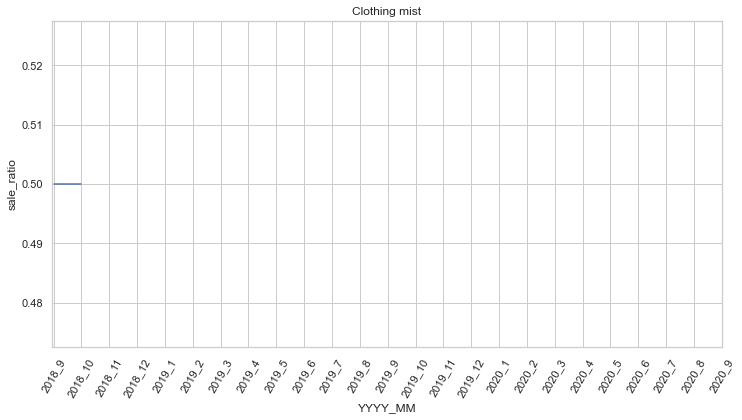

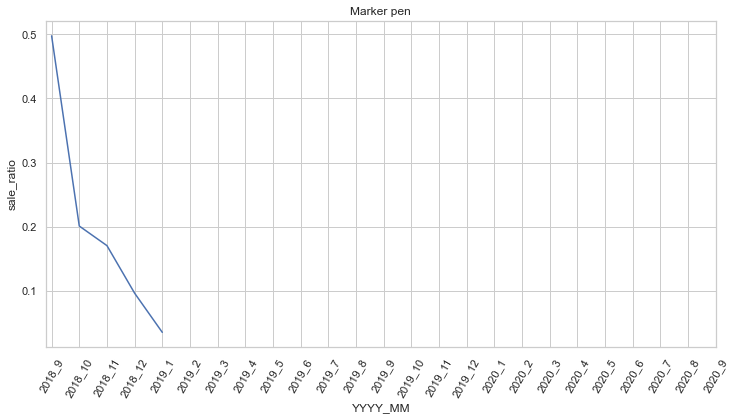

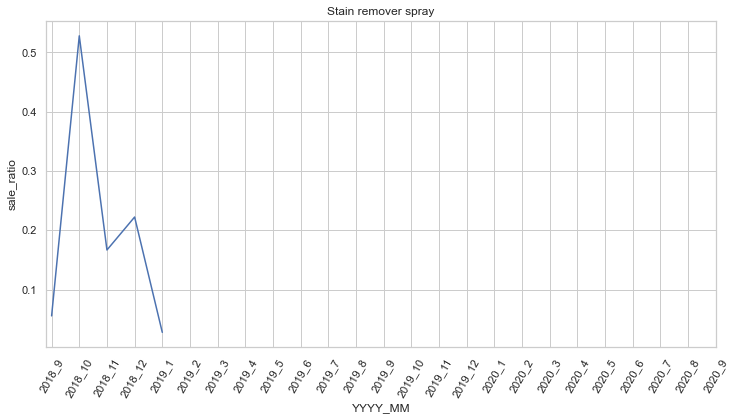

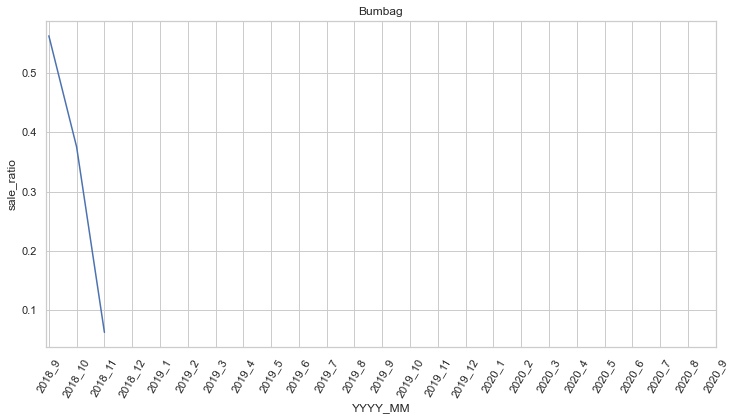

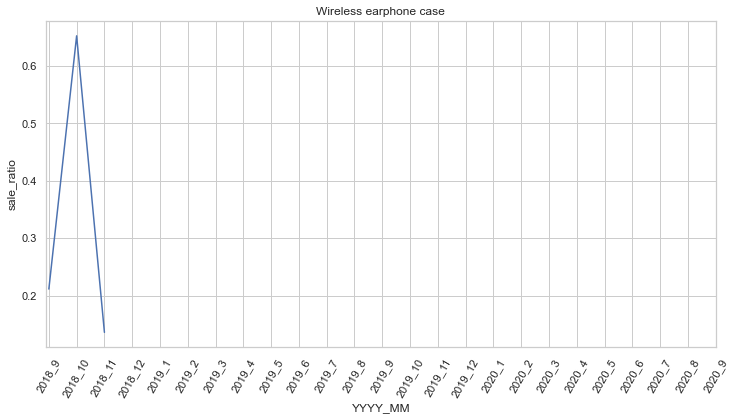

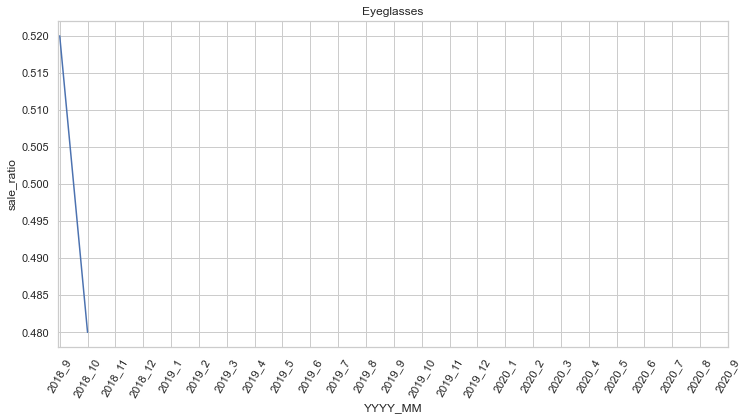

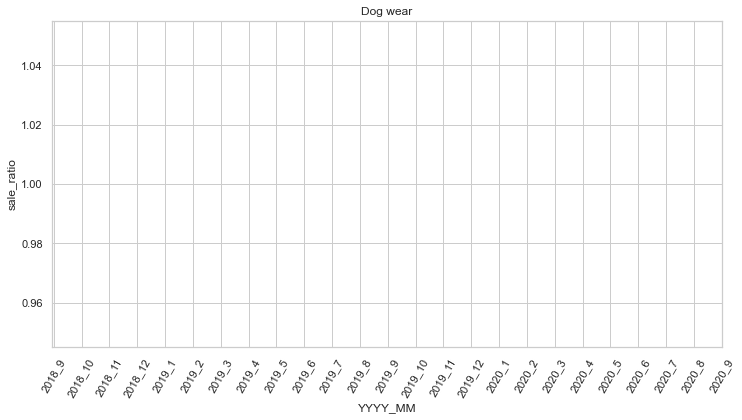

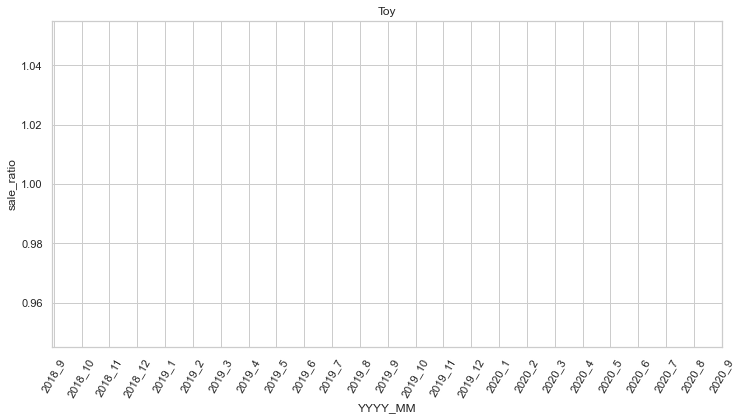

In [ ]:
for name in month_sale['product_type_name'].unique():
    tmp = month_sale[month_sale['product_type_name']==name]
    plt.figure(figsize=(12,6))
    sns.lineplot(x='YYYY_MM', y='sale_ratio', data=tmp)
    month = [
        "2018_9",
        "2018_10",
        "2018_11",
        "2018_12",
        "2019_1",
        "2019_2",
        "2019_3",
        "2019_4",
        "2019_5",
        "2019_6",
        "2019_7",
        "2019_8",
        "2019_9",
        "2019_10",
        "2019_11",
        "2019_12",
        "2020_1",
        "2020_2",
        "2020_3",
        "2020_4",
        "2020_5",
        "2020_6",
        "2020_7",
        "2020_8",
        "2020_9",
    ]
    plt.xticks(range(len(month)), month, rotation=60)
    plt.title(name)
    plt.show()
# for name in week_sale['product_type_name'].unique():
#     tmp = week_sale[week_sale['product_type_name']==name]
#     plt.figure(figsize=(12,6))
#     sns.lineplot(x='week', y='sale_ratio', data=tmp)
#     plt.xticks(rotation=60)
#     plt.title(name)
#     plt.show()

Season

In [ ]:
summer = [
    "Sunglasses",
    "Hat/brim",
    "Sandals",
    "Flat shoe",
    "Heeled sandals",
    "Polo shirt",
    "Dress",
    "T-shirt",
    "Skirt",
    "Vest top",
    "Swimwear top",
    "Swimsuit",
    "Swimwear bottom",
    "Bikini top",
    "Shorts",
]
winter = [
    "Beanie",
    "Felt hat",
    "Outdoor overall",
    "Long John",
    "Pyjama bottom",
    "Hat/beanie",
    "Leggings/Tights",
    "Hoodie",
    "Underwear Tights",
    "Pyjama set",
    "Boots",
    "Cardigan",
    "Sweater",
    "Jacket",
    "Scarf",
    "Coat",
    "Gloves",
    "Outdoor Waistcoat",
]

In [ ]:
month_sale['season_type'] = 0
month_sale.loc[month_sale['product_type_name'].isin(summer), 'season_type'] = 1
month_sale.loc[month_sale['product_type_name'].isin(winter), 'season_type'] = 2
# week_sale['season_type'] = 0
# week_sale.loc[week_sale['product_type_name'].isin(summer), 'season_type'] = 1
# week_sale.loc[week_sale['product_type_name'].isin(winter), 'season_type'] = 2

C:\Users\Weipeng Zhang\AppData\Local\Temp\ipykernel_3988\2244673180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["YYYY_MM"] = tmp["YYYY_MM"].astype("category")


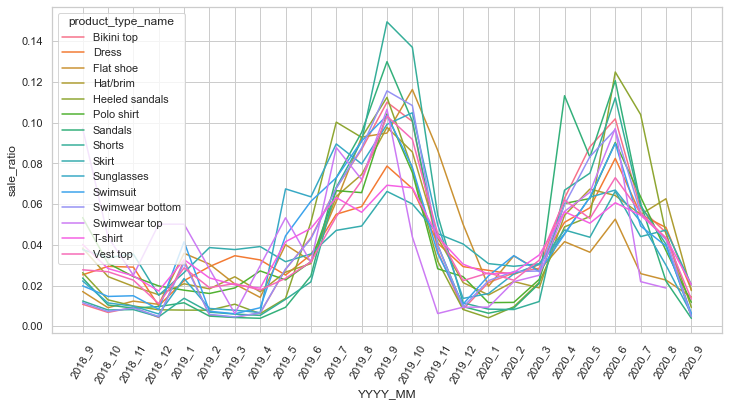

C:\Users\Weipeng Zhang\AppData\Local\Temp\ipykernel_3988\2244673180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["YYYY_MM"] = tmp["YYYY_MM"].astype("category")


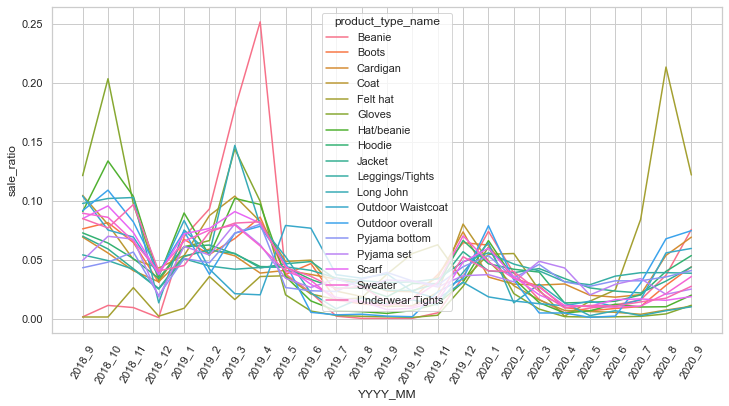

In [ ]:
for season_type in [1, 2]:
    tmp = month_sale[month_sale["season_type"] == season_type]
    tmp["YYYY_MM"] = tmp["YYYY_MM"].astype("category")
    month = [
        "2018_9",
        "2018_10",
        "2018_11",
        "2018_12",
        "2019_1",
        "2019_2",
        "2019_3",
        "2019_4",
        "2019_5",
        "2019_6",
        "2019_7",
        "2019_8",
        "2019_9",
        "2019_10",
        "2019_11",
        "2019_12",
        "2020_1",
        "2020_2",
        "2020_3",
        "2020_4",
        "2020_5",
        "2020_6",
        "2020_7",
        "2020_8",
        "2020_9",
    ]
    plt.figure(figsize=(12, 6))
    sns.lineplot(x="YYYY_MM", y="sale_ratio", data=tmp, hue="product_type_name")
    plt.xticks(range(len(month)), month, rotation=60)
    plt.show()
# for season_type in [1,2]:
#     tmp = week_sale[week_sale['season_type']==season_type]
#     plt.figure(figsize=(12,6))
#     sns.lineplot(x='week', y='sale_ratio', data=tmp, hue='product_type_name')
#     plt.xticks(rotation=60)
#     plt.show()


In [ ]:
trans['season_type'] = 0
trans.loc[trans['product_type_name'].isin(summer), 'season_type'] = 1
trans.loc[trans['product_type_name'].isin(winter), 'season_type'] = 2

In [ ]:
# * Cover rate
1 - trans[trans['season_type']==0]['article_id'].nunique() / trans['article_id'].nunique()

0.5568500291734818

In [ ]:
area_trans = trans[trans['season_type'].isin([1,2])]

In [ ]:
area_ttl_sale = area_trans.groupby(['postal_code','season_type']).size().reset_index(name='ttl_sale')
area_sale = area_trans.groupby(['postal_code','YYYY_MM','season_type']).size().reset_index(name='month_sale')
area_sale = area_sale.merge(area_ttl_sale, on=['postal_code','season_type'], how='left')
area_sale['sale_ratio'] = area_sale['month_sale'] / area_sale['ttl_sale']

In [ ]:
area_sale['month'] = area_sale['YYYY_MM'].apply(lambda x: int(x.split('_')[1]))
area_sale['season'] = 0
area_sale.loc[area_sale['month'].isin([7,8,9,10]), 'season'] = 1
area_sale.loc[area_sale['month'].isin([12,1,2,3]), 'season'] = 2

In [ ]:
season_sale = area_sale.groupby(['postal_code','season_type','season'])['sale_ratio'].sum().reset_index(name='season_sale_ratio')

In [ ]:
summer_area_winter_sale = season_sale[(season_sale['season_type']==2) & (season_sale['season']==1)]
winter_area_summer_sale = season_sale[(season_sale['season_type']==1) & (season_sale['season']==2)]

<AxesSubplot:>

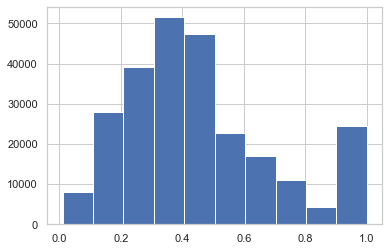

In [ ]:
summer_area_winter_sale['season_sale_ratio'].hist()

<AxesSubplot:>

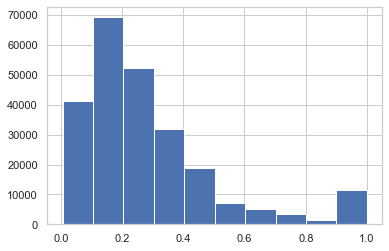

In [ ]:
winter_area_summer_sale['season_sale_ratio'].hist()

As we can see, summer cloths are all sold in 'winter' in some area, winter cloths are all sold in 'summer' in some area, are these areas in the Southern Hemisphere?

In [ ]:
postal_codes_1 = summer_area_winter_sale[summer_area_winter_sale['season_sale_ratio']>=0.8]['postal_code'].unique()
postal_codes_2 = winter_area_summer_sale[winter_area_summer_sale['season_sale_ratio']>=0.8]['postal_code'].unique()

In [ ]:
len(postal_codes_1), len(postal_codes_2)

(30877, 13582)

In [ ]:
south_areas = set(postal_codes_1) | set(postal_codes_2)

In [ ]:
len(south_areas) / trans['postal_code'].nunique()

0.12329708005994278

In [ ]:
area_ttl_sale['ttl_sale'].median()

15.0

In [ ]:
area_ttl_sale.loc[area_ttl_sale['postal_code'].isin(south_areas),'ttl_sale'].mean()

7.293889452658352